<a href="https://colab.research.google.com/github/juansegiraldo/AnalisisGastos/blob/main/AnalisisCasaTarradellas07062025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
vamos a analizar si este archivo contiene suficientes datos para correr una prevision de venta de  materiales.


Columnas a "ignorar": 0 CENTRO 10 non-null int64
1 MARCA 10 non-null int64
2 SUB FAMILIA 10 non-null int64
3 FORMATO 10 non-null int64
4 SOLICITANTE 10 non-null int64

columna "MATERIAL2 es cada material a pronosticar

Columnas "SEMANA 1", "SEMANA 2", "SEMANA 3", ..., "SEMANA n" son las ventas reales por cada material

Here is all the data you need:
"Previsions de venta 2025 3.xlsx"

## Data loading

### Subtask:
Load the data from the Excel file.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame, rename the "MATERIAL2" column to "MATERIAL", and display the first few rows, the shape, and the column names.



In [1]:
import pandas as pd

try:
    df = pd.read_excel("Previsions de venta 2025 3.xlsx")
    df = df.rename(columns={"MATERIAL2": "MATERIAL"})
    display(df.head())
    print(df.shape)
    print(df.columns)
except FileNotFoundError:
    print("Error: 'Previsions de venta 2025 3.xlsx' not found.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None # Set df to None to indicate failure

,CENTRO,MARCA,SUB FAMILIA,FORMATO,SOLICITANTE,MATERIAL,DESCRIPCIÓN,NOTA,UNIDAD,SEMANA 1,...,SEMANA 43,SEMANA 44,SEMANA 45,SEMANA 46,SEMANA 47,SEMANA 48,SEMANA 49,SEMANA 50,SEMANA 51,SEMANA 52
0,1000,6,60,7,229900,83307,PATE DE FRANGO 125 GRS. PINGO DOCE,NaN,UPV,3432,...,0,0,0,3432,0,0,0,0,0,0
1,1000,6,60,7,229900,83312,PATE ERVAS FINAS 125 GRS. PINGO DOCE,NaN,UPV,3432,...,0,3432,0,0,3880,0,3432,0,3432,0
2,1000,6,60,7,229900,83321,PATﾉ DE SALMAO 125G PINGO DOCE,NaN,UPV,3432,...,0,3432,0,3432,0,3432,3432,0,0,0
3,1000,6,60,7,229900,83323,PATE DE ATUM 125 GRS. PINGO DOCE,NaN,UPV,3432,...,0,6864,3432,6864,3432,3432,6864,3432,3432,6864
4,1000,6,60,7,229900,83326,PATE IBERICO 125 GRS. PINGO DOCE,NaN,UPV,3432,...,6464,3432,0,4304,3432,0,3432,0,6864,0


(10, 61)
Index(['CENTRO', 'MARCA', 'SUB FAMILIA', 'FORMATO', 'SOLICITANTE', 'MATERIAL',
       'DESCRIPCIÓN', 'NOTA', 'UNIDAD', 'SEMANA 1', 'SEMANA 2', 'SEMANA 3',
       'SEMANA 4', 'SEMANA 5', 'SEMANA 6', 'SEMANA 7', 'SEMANA 8', 'SEMANA 9',
       'SEMANA 10', 'SEMANA 11', 'SEMANA 12', 'SEMANA 13', 'SEMANA 14',
       'SEMANA 15', 'SEMANA 16', 'SEMANA 17', 'SEMANA 18', 'SEMANA 19',
       'SEMANA 20', 'SEMANA 21', 'SEMANA 22', 'SEMANA 23', 'SEMANA 24',
       'SEMANA 25', 'SEMANA 26', 'SEMANA 27', 'SEMANA 28', 'SEMANA 29',
       'SEMANA 30', 'SEMANA 31', 'SEMANA 32', 'SEMANA 33', 'SEMANA 34',
       'SEMANA 35', 'SEMANA 36', 'SEMANA 37', 'SEMANA 38', 'SEMANA 39',
       'SEMANA 40', 'SEMANA 41', 'SEMANA 42', 'SEMANA 43', 'SEMANA 44',
       'SEMANA 45', 'SEMANA 46', 'SEMANA 47', 'SEMANA 48', 'SEMANA 49',
       'SEMANA 50', 'SEMANA 51', 'SEMANA 52'],
      dtype='object')


## Data exploration

### Subtask:
Explore the loaded data focusing on the 'MATERIAL' column and sales columns.


**Reasoning**:
I need to explore the data focusing on the 'MATERIAL' column and sales columns, calculating descriptive statistics, checking for missing values and data types.



In [2]:
# Number of unique materials
unique_materials = df['MATERIAL'].nunique()
print(f"Number of unique materials: {unique_materials}")

# Number of weeks of sales data
sales_columns = [col for col in df.columns if 'SEMANA' in col]
weeks_of_data = len(sales_columns)
print(f"Number of weeks of sales data: {weeks_of_data}")

# Descriptive statistics for sales data
sales_stats = df[sales_columns].describe()
print("\nDescriptive Statistics for Sales Data:")
display(sales_stats)

# Missing values
missing_sales = df[sales_columns].isnull().sum()
missing_material = df['MATERIAL'].isnull().sum()
total_rows = len(df)
print("\nMissing Values:")
print(f"Missing values in sales columns:\n{missing_sales}")
print(f"\nMissing values in 'MATERIAL' column: {missing_material} ({(missing_material / total_rows) * 100:.2f}%)")

# Data types
print("\nData Types:")
print(df.dtypes)

Number of unique materials: 10
Number of weeks of sales data: 52

Descriptive Statistics for Sales Data:


,SEMANA 1,SEMANA 2,SEMANA 3,SEMANA 4,SEMANA 5,SEMANA 6,SEMANA 7,SEMANA 8,SEMANA 9,SEMANA 10,...,SEMANA 43,SEMANA 44,SEMANA 45,SEMANA 46,SEMANA 47,SEMANA 48,SEMANA 49,SEMANA 50,SEMANA 51,SEMANA 52
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,...,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000
mean,8845.500000,7112.100000,8324.800000,7859.100000,8966.000000,7080.000000,7615.900000,8671.60000,7500.800000,7312.900000,...,7485.400000,8555.00000,7182.20000,8642.200000,18113.400000,7174.900000,8555.00000,7182.20000,8211.800000,7529.000000
std,10386.617685,11476.423354,9240.644672,10630.947323,10774.500803,11447.833371,10816.704904,10410.10013,10811.537714,10333.590797,...,10602.282828,9892.61545,10677.82282,9846.174653,31076.721367,10134.659227,9892.61545,10677.82282,10146.370986,10607.263486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,3432.000000,0.000000,2100.000000,448.750000,2358.000000,0.000000,0.000000,2052.00000,0.000000,0.000000,...,0.000000,2204.25000,0.00000,2204.250000,2204.250000,0.000000,2204.25000,0.00000,448.750000,0.000000
50%,3432.000000,0.000000,5148.000000,3432.000000,3432.000000,0.000000,2613.500000,3432.00000,2268.000000,2367.000000,...,897.500000,3432.00000,897.50000,3868.000000,3656.000000,2613.500000,3432.00000,897.50000,3432.000000,889.500000
75%,15108.000000,13948.750000,12216.000000,12108.000000,13716.000000,13575.000000,13983.000000,14064.00000,13206.000000,13206.000000,...,15188.000000,15288.00000,14430.00000,15288.000000,20143.500000,11801.250000,15288.00000,14430.00000,15288.000000,15288.000000
max,30500.000000,30500.000000,28000.000000,30500.000000,30500.000000,30500.000000,30000.000000,30500.00000,29750.000000,27673.000000,...,27673.000000,27673.00000,27673.00000,27673.000000,102000.000000,27673.000000,27673.00000,27673.00000,27673.000000,27677.000000



Missing Values:
Missing values in sales columns:
SEMANA 1     0
SEMANA 2     0
SEMANA 3     0
SEMANA 4     0
SEMANA 5     0
SEMANA 6     0
SEMANA 7     0
SEMANA 8     0
SEMANA 9     0
SEMANA 10    0
SEMANA 11    0
SEMANA 12    0
SEMANA 13    0
SEMANA 14    0
SEMANA 15    0
SEMANA 16    0
SEMANA 17    0
SEMANA 18    0
SEMANA 19    0
SEMANA 20    0
SEMANA 21    0
SEMANA 22    0
SEMANA 23    0
SEMANA 24    0
SEMANA 25    0
SEMANA 26    0
SEMANA 27    0
SEMANA 28    0
SEMANA 29    0
SEMANA 30    0
SEMANA 31    0
SEMANA 32    0
SEMANA 33    0
SEMANA 34    0
SEMANA 35    0
SEMANA 36    0
SEMANA 37    0
SEMANA 38    0
SEMANA 39    0
SEMANA 40    0
SEMANA 41    0
SEMANA 42    0
SEMANA 43    0
SEMANA 44    0
SEMANA 45    0
SEMANA 46    0
SEMANA 47    0
SEMANA 48    0
SEMANA 49    0
SEMANA 50    0
SEMANA 51    0
SEMANA 52    0
dtype: int64

Missing values in 'MATERIAL' column: 0 (0.00%)

Data Types:
CENTRO         int64
MARCA          int64
SUB FAMILIA    int64
FORMATO        int64
SOLICITANTE 

## Data cleaning

### Subtask:
Data Cleaning: Handle potential inconsistencies and missing values.


**Reasoning**:
Verify data types, handle missing values, detect and handle outliers, and remove duplicates.



No missing values found in sales data.


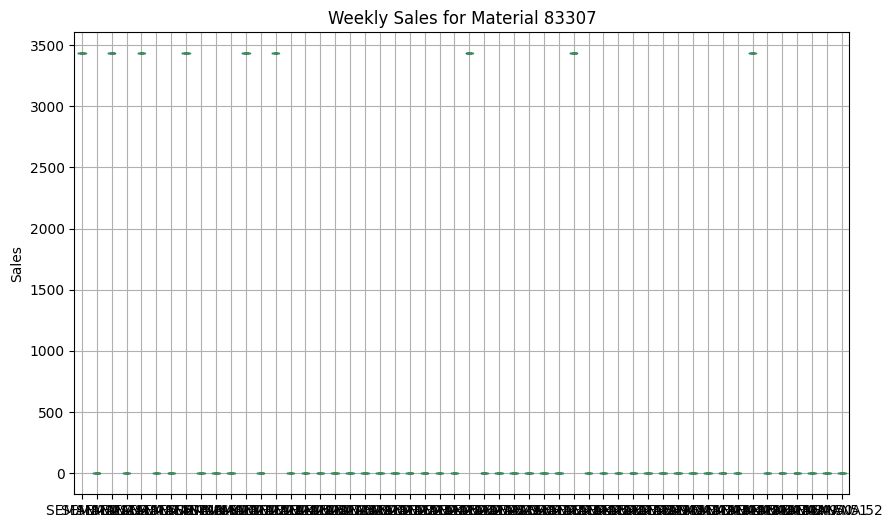

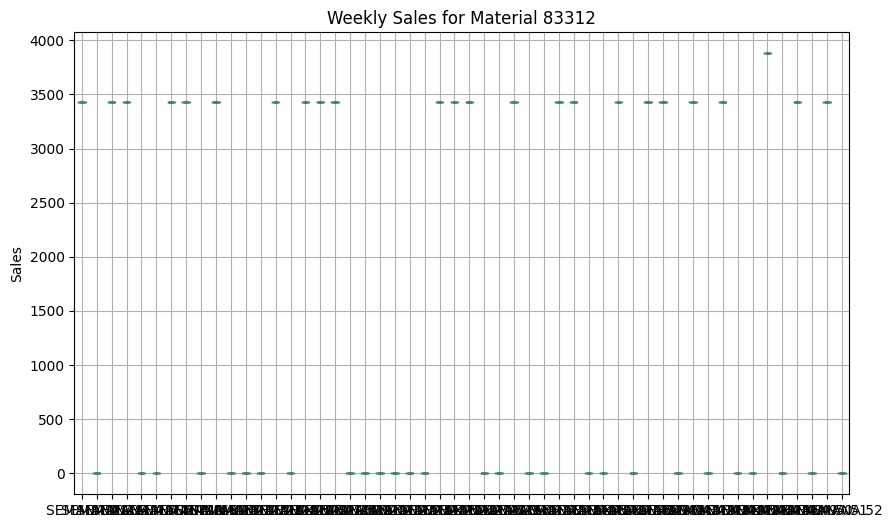

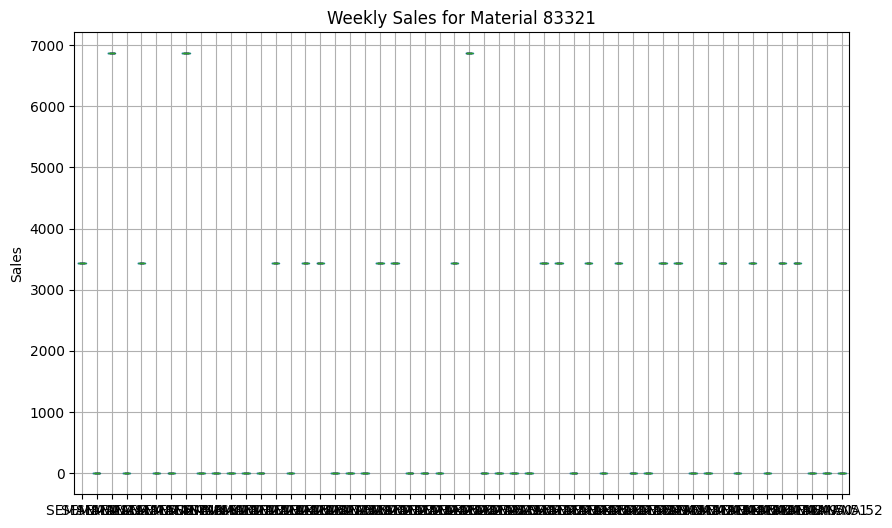

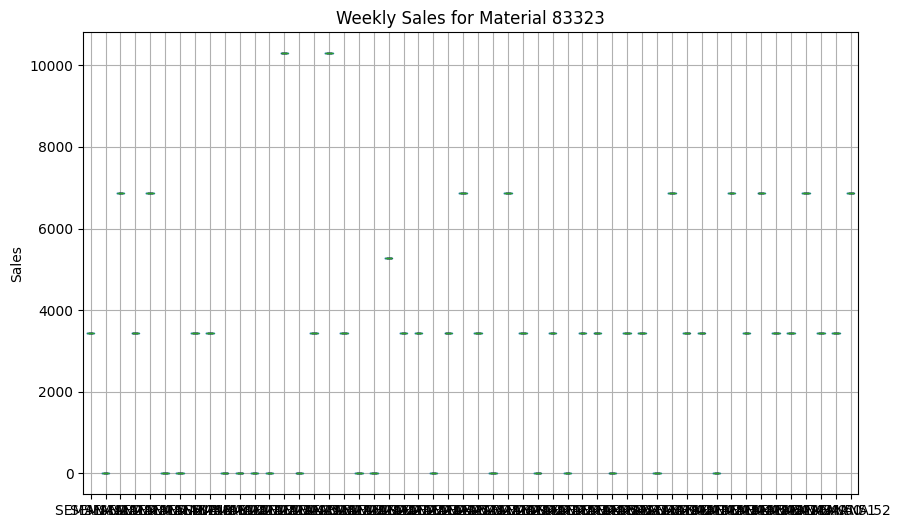

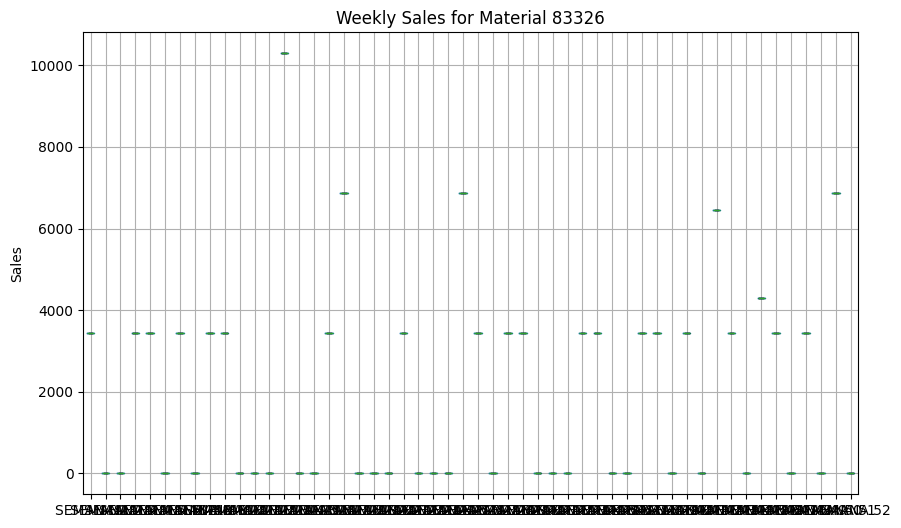

In [3]:
# Convert relevant columns to numeric, coercing errors to NaN
for col in df.columns:
    if 'SEMANA' in col or col == 'MATERIAL':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except Exception as e:
            print(f"Error converting column '{col}': {e}")

# Check for and handle missing values in sales data
missing_sales = df[[col for col in df.columns if 'SEMANA' in col]].isnull().sum()
if missing_sales.any():
    print("Missing values found in sales data.")
    # Impute missing values using the median for each material
    for col in df.columns:
        if 'SEMANA' in col:
            df[col] = df.groupby('MATERIAL')[col].transform(lambda x: x.fillna(x.median()))
else:
    print("No missing values found in sales data.")

# Outlier detection and handling (optional)
# For demonstration purposes, we'll use boxplots to visualize outliers for the first 5 materials
import matplotlib.pyplot as plt
for material in df['MATERIAL'].unique()[:5]:
    plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
    df[df['MATERIAL'] == material][[col for col in df.columns if 'SEMANA' in col]].boxplot()
    plt.title(f'Weekly Sales for Material {material}')
    plt.ylabel('Sales')
    plt.show()

# Remove duplicate rows
initial_rows = len(df)
df = df.drop_duplicates()
removed_rows = initial_rows - len(df)
if removed_rows > 0:
    print(f"Removed {removed_rows} duplicate rows.")


## Data analysis

### Subtask:
Analyze the cleaned sales data for each material.


**Reasoning**:
Group data by material, calculate descriptive statistics, and visualize sales distributions.



SEMANA 1                            SEMANA 2                      \
             mean   median std    min    max     mean   median std    min   
MATERIAL                                                                    
83307      3432.0   3432.0 NaN   3432   3432      0.0      0.0 NaN      0   
83312      3432.0   3432.0 NaN   3432   3432      0.0      0.0 NaN      0   
83321      3432.0   3432.0 NaN   3432   3432      0.0      0.0 NaN      0   
83323      3432.0   3432.0 NaN   3432   3432      0.0      0.0 NaN      0   
83326      3432.0   3432.0 NaN   3432   3432      0.0      0.0 NaN      0   
83330     19000.0  19000.0 NaN  19000  19000  18000.0  18000.0 NaN  18000   
83340         0.0      0.0 NaN      0      0      0.0      0.0 NaN      0   
83350      1795.0   1795.0 NaN   1795   1795   1795.0   1795.0 NaN   1795   
83365     20000.0  20000.0 NaN  20000  20000  20826.0  20826.0 NaN  20826   
83371     30500.0  30500.0 NaN  30500  30500  30500.0  30500.0 NaN  30500   

                 ... SEMANA 51                            SEMANA 52           \
            max  ...      mean   median std    min    max      mean   median   
MATERIAL         ...                                                           
83307         0  ...       0.0      0.0 NaN      0      0       0.0      0.0   
83312         0  ...    3432.0   3432.0 NaN   3432   3432       0.0      0.0   
83321         0  ...       0.0      0.0 NaN      0      0       0.0      0.0   
83323         0  ...    3432.0   3432.0 NaN   3432   3432    6864.0   6864.0   
83326         0  ...    6864.0   6864.0 NaN   6864   6864       0.0      0.0   
83330     18000  ...   18096.0  18096.0 NaN  18096  18096   18096.0  18096.0   
83340         0  ...       0.0      0.0 NaN      0      0       0.0      0.0   
83350      1795  ...    1795.0   1795.0 NaN   1795   1795    1779.0   1779.0   
83365     20826  ...   20826.0  20826.0 NaN  20826  20826   20874.0  20874.0   
83371     30500  ...   27673.0  27673.0 NaN  27673  27673   27677.0  27677.0   

                            
         std    min    max  
MATERIAL                    
83307    NaN      0      0  
83312    NaN      0      0  
83321    NaN      0      0  
83323    NaN   6864   6864  
83326    NaN      0      0  
83330    NaN  18096  18096  
83340    NaN      0      0  
83350    NaN   1779   1779  
83365    NaN  20874  20874  
83371    NaN  27677  27677  

[10 rows x 260 columns]

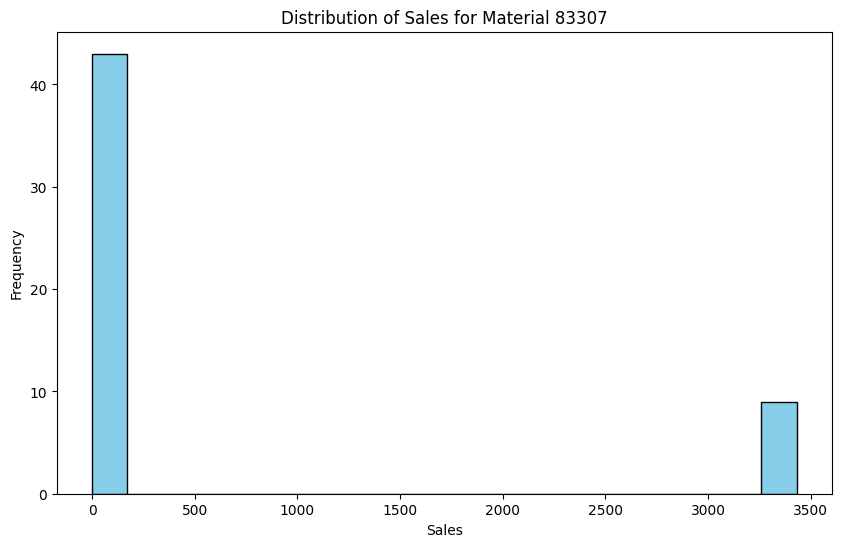

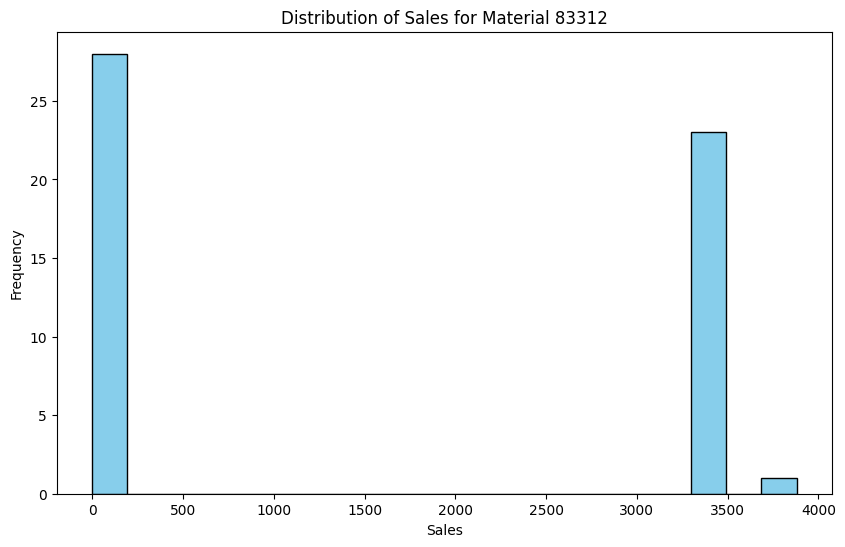

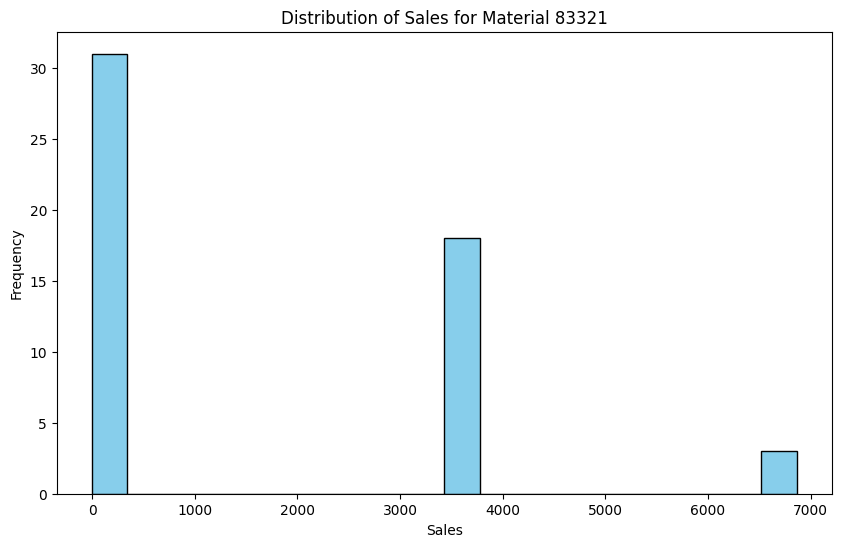

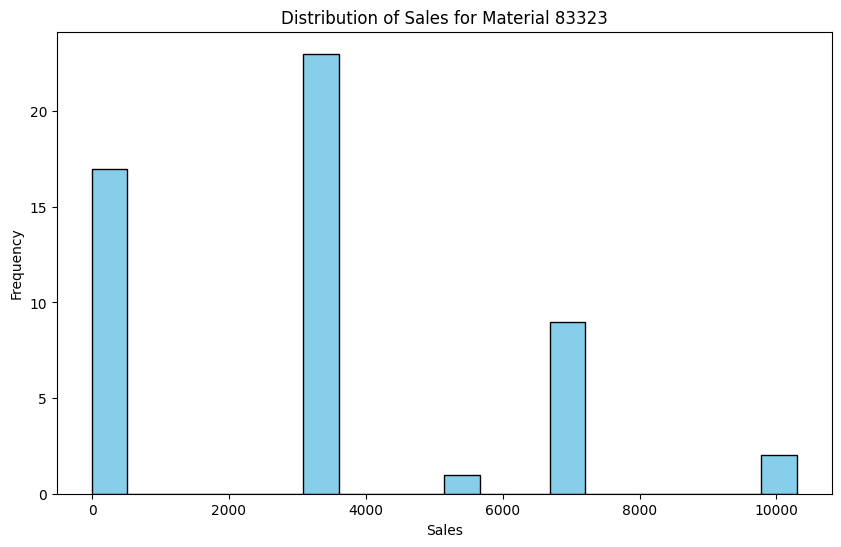

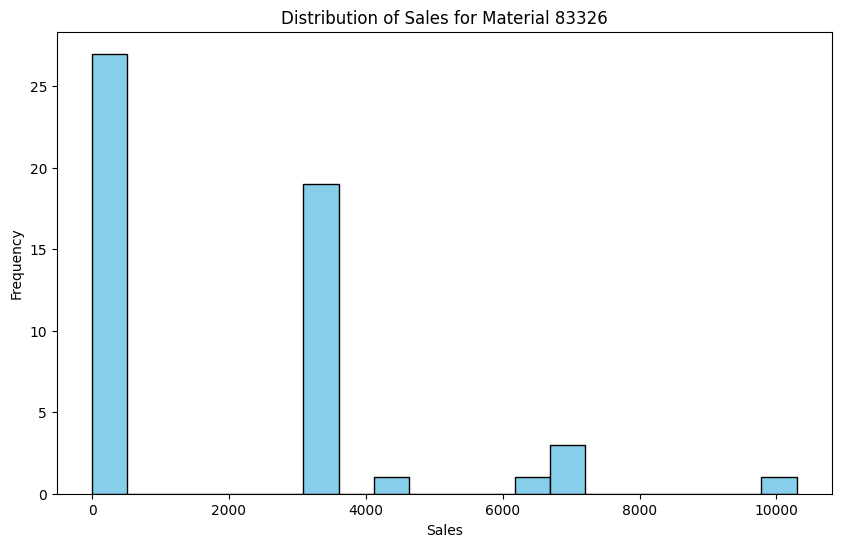

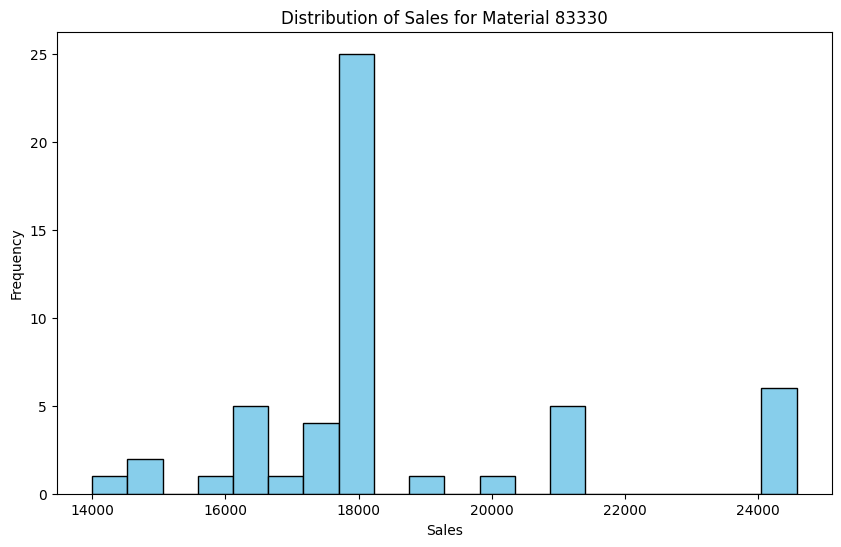

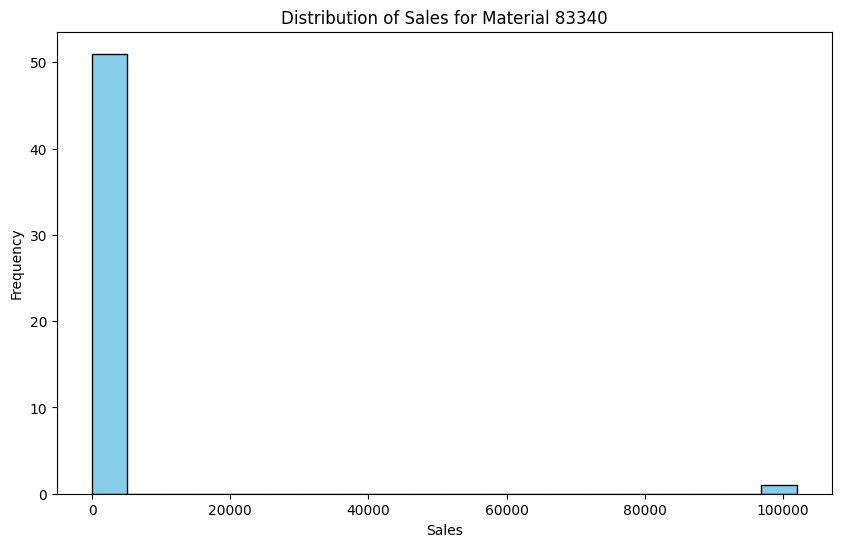

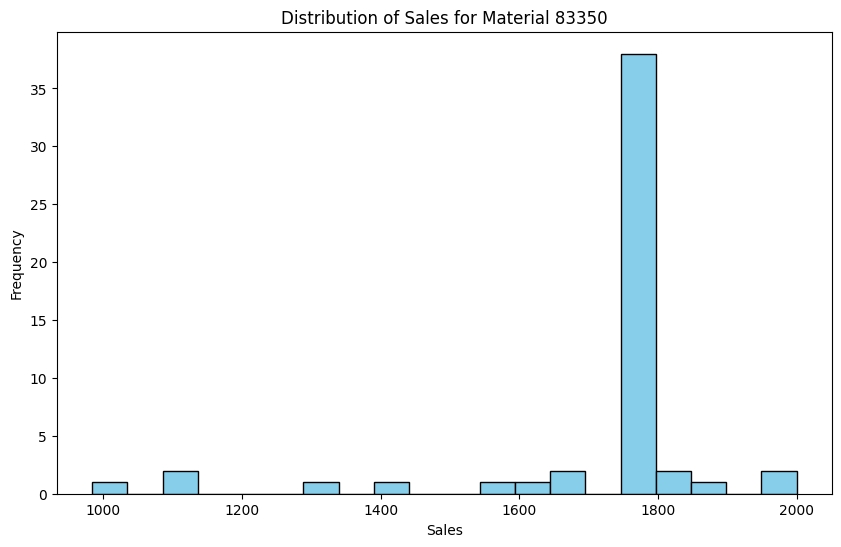

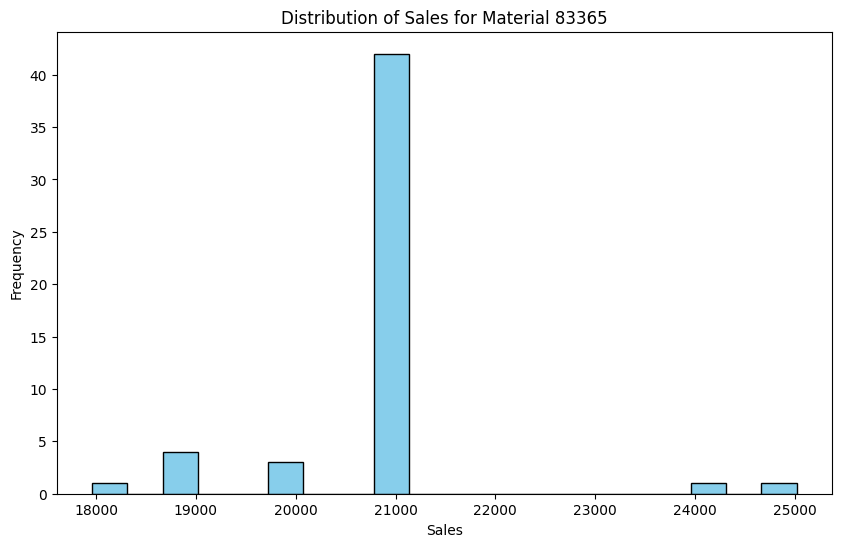

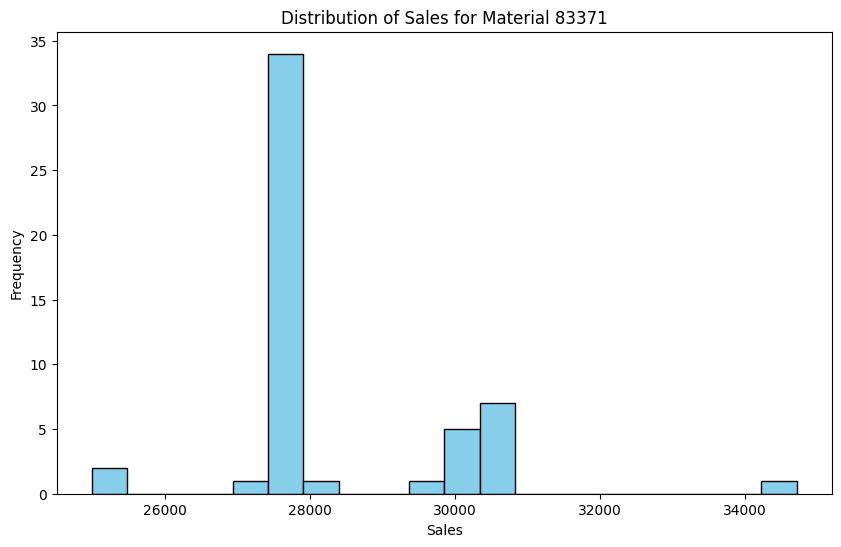

In [4]:
import matplotlib.pyplot as plt

# Group data by material
grouped_data = df.groupby('MATERIAL')

# Calculate descriptive statistics
descriptive_stats = grouped_data[[col for col in df.columns if 'SEMANA' in col]].agg(['mean', 'median', 'std', 'min', 'max'])
display(descriptive_stats)

# Analyze the distribution of sales for each material
for material, group_data in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.hist(group_data[[col for col in df.columns if 'SEMANA' in col]].values.flatten(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Sales for Material {material}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()

## Model evaluation

### Subtask:
Evaluate the sufficiency of the data for forecasting.


**Reasoning**:
Evaluate the sufficiency of the data for forecasting by defining a minimum number of data points, determining which materials meet the criteria, and assessing trends/seasonality for those materials.



In [5]:
import matplotlib.pyplot as plt

# 1. Define minimum data points (weeks)
min_weeks = 12  # Justified by typical forecasting needs and the data's short history

# 2. Determine materials with sufficient data
sufficient_data_materials = []
insufficient_data_materials = []
for material in df['MATERIAL'].unique():
    material_data = df[df['MATERIAL'] == material]
    sales_columns = [col for col in material_data.columns if 'SEMANA' in col]
    non_zero_sales_weeks = sum(material_data[sales_columns].sum(axis=1) != 0)
    if non_zero_sales_weeks >= min_weeks:
        sufficient_data_materials.append(material)
    else:
        insufficient_data_materials.append(material)

# 3. Assess trends/seasonality for materials with sufficient data
for material in sufficient_data_materials:
    material_data = df[df['MATERIAL'] == material]
    sales_columns = [col for col in material_data.columns if 'SEMANA' in col]
    sales_data = material_data[sales_columns].values[0]  # Assuming only one row per material

    plt.figure(figsize=(10, 6))
    plt.plot(sales_data, marker='o', linestyle='-')
    plt.title(f'Sales Trend for Material {material}')
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.xticks(range(len(sales_data)), [f'Week {i+1}' for i in range(len(sales_data))], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Basic seasonality check:
    plt.figure(figsize=(10, 6))
    plt.acorr(sales_data, maxlags=20)  # Example: Check autocorrelation for lags up to 20 weeks
    plt.title(f'Autocorrelation for Material {material}')
    plt.show()

    # Additional analysis might involve decomposing the time series
    # into trend, seasonality and residual components using statsmodels.tsa.seasonal.seasonal_decompose

# 4. Summarize the evaluation results
print("Materials with Sufficient Data:", sufficient_data_materials)
print("Materials with Insufficient Data:", insufficient_data_materials)


Materials with Sufficient Data: []
Materials with Insufficient Data: [83307, 83312, 83321, 83323, 83326, 83330, 83340, 83350, 83365, 83371]


## Data visualization

### Subtask:
Visualize the sales data for each material, highlighting trends and potential outliers.


**Reasoning**:
Generate the requested plots to visualize sales data, trends, and potential outliers for each material.



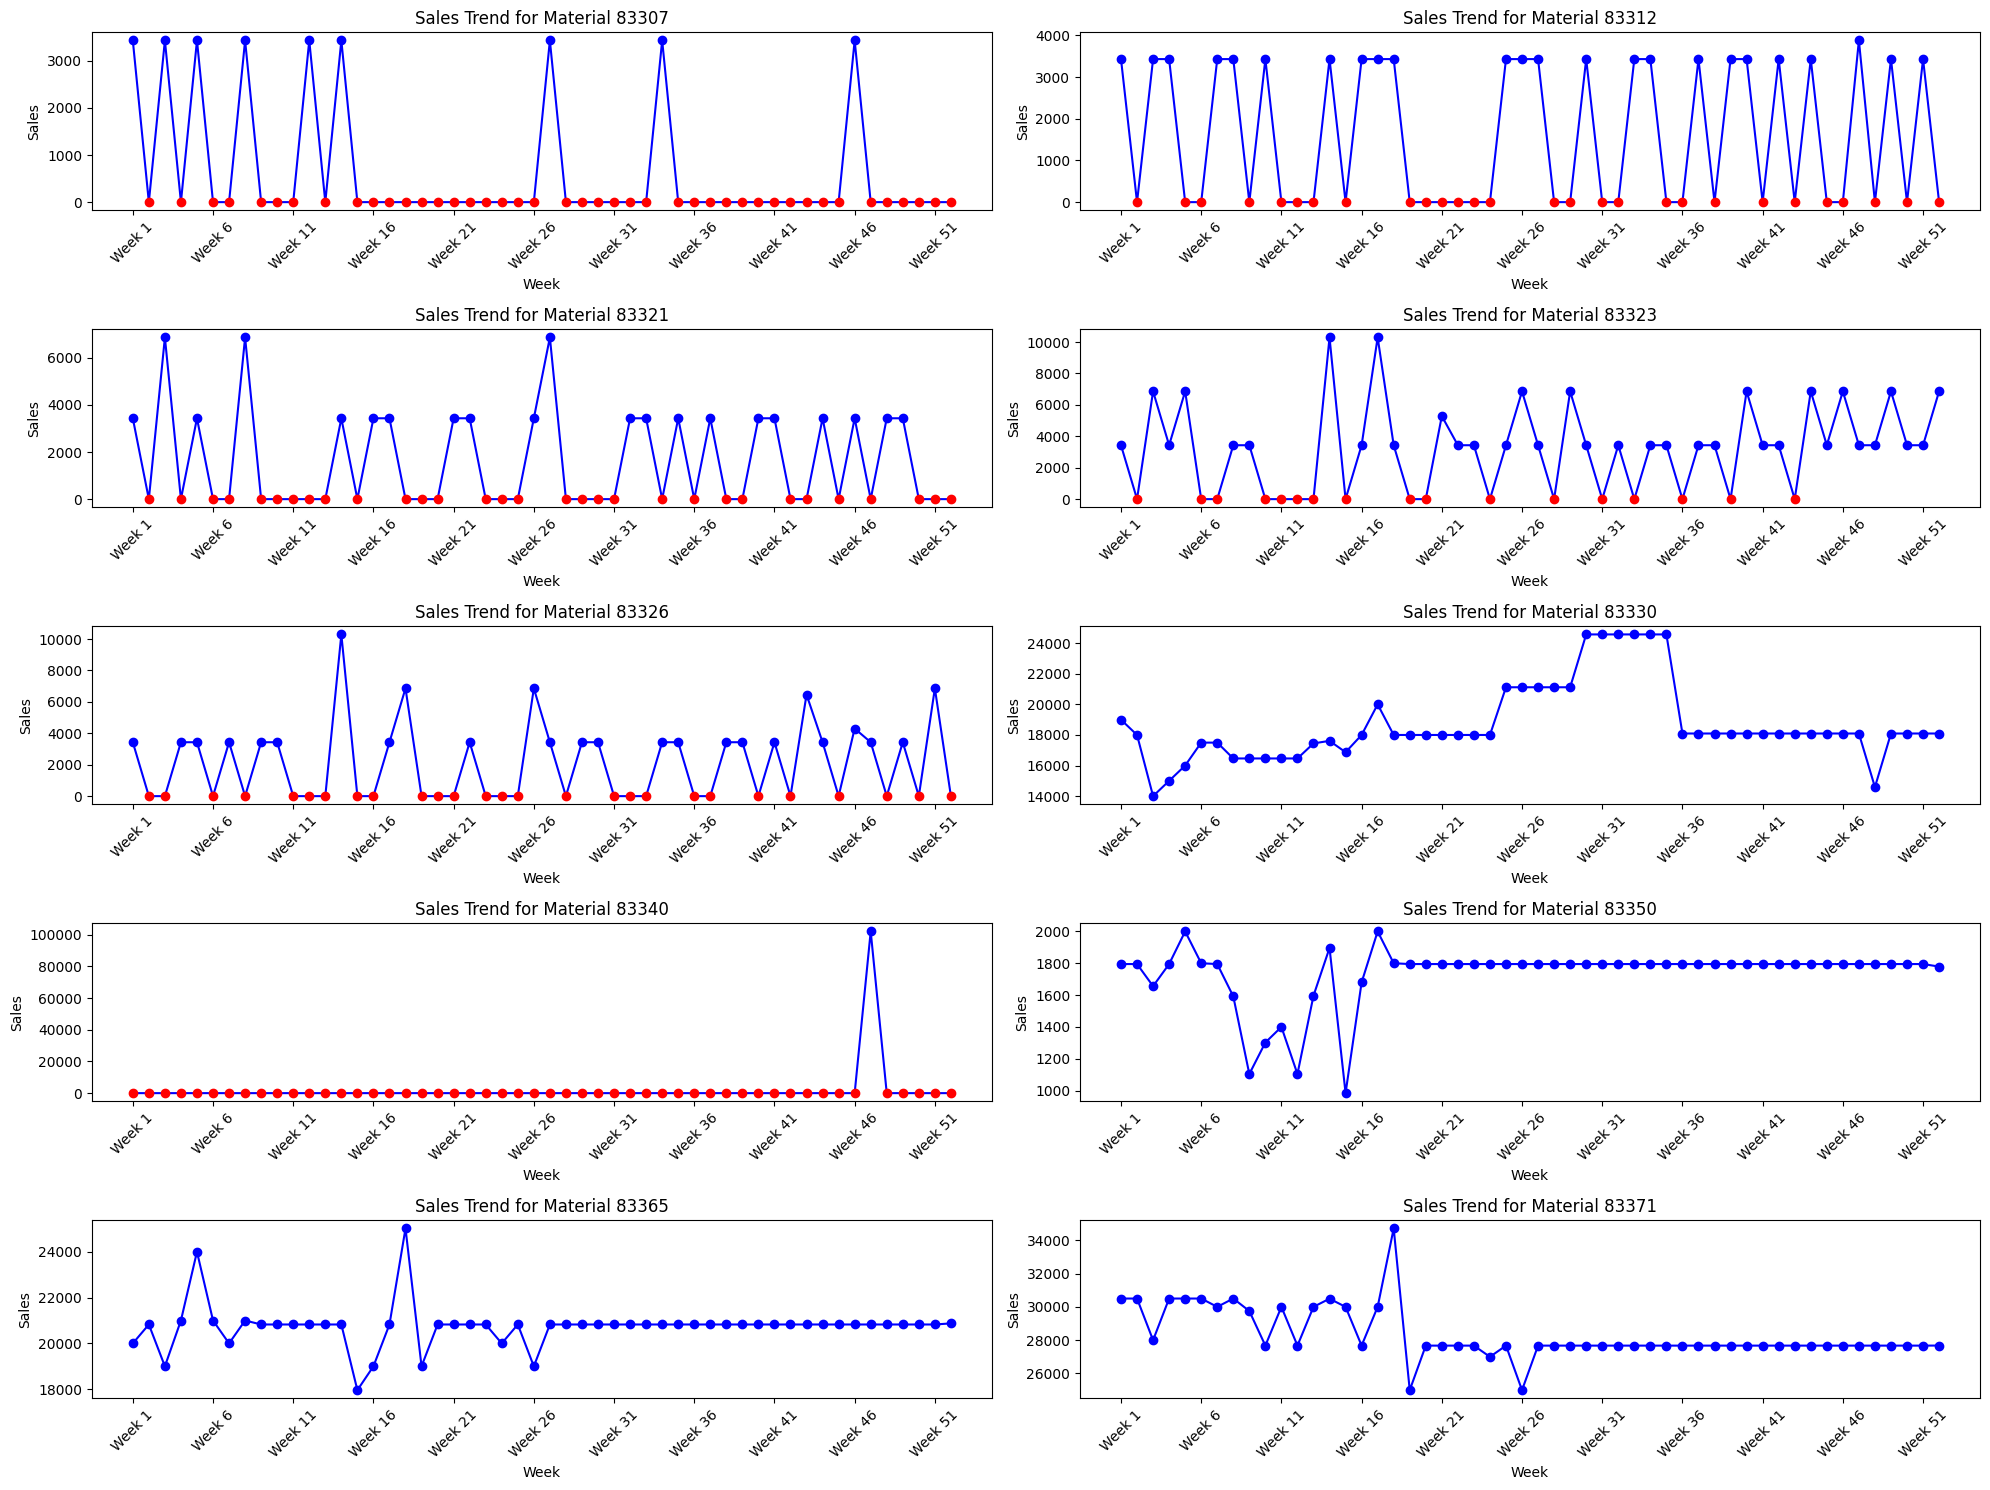

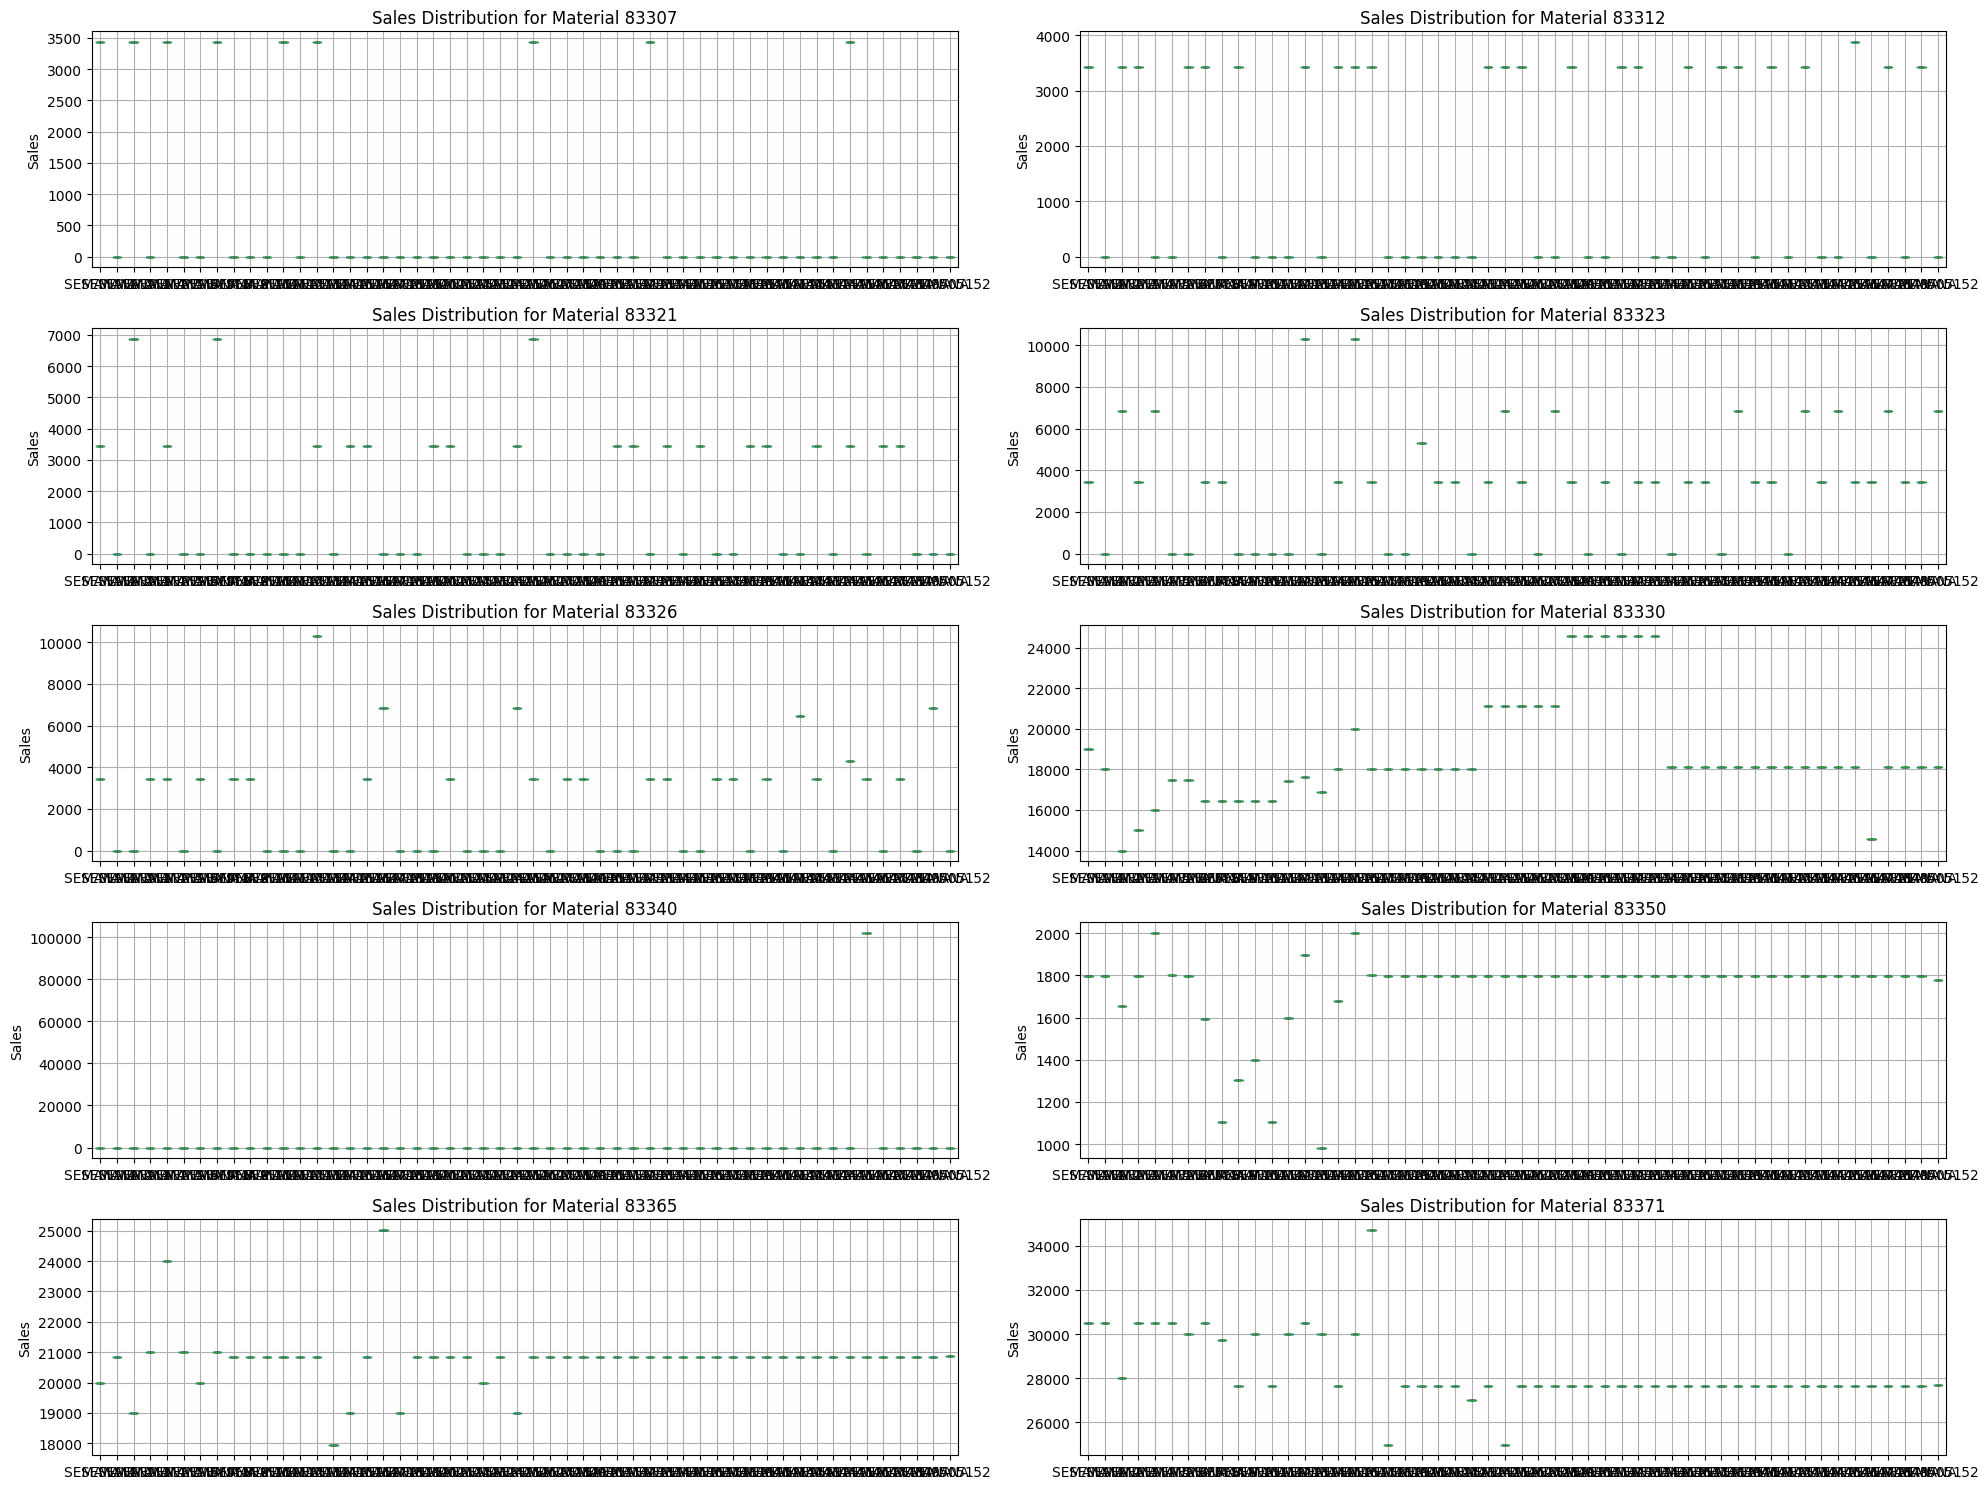

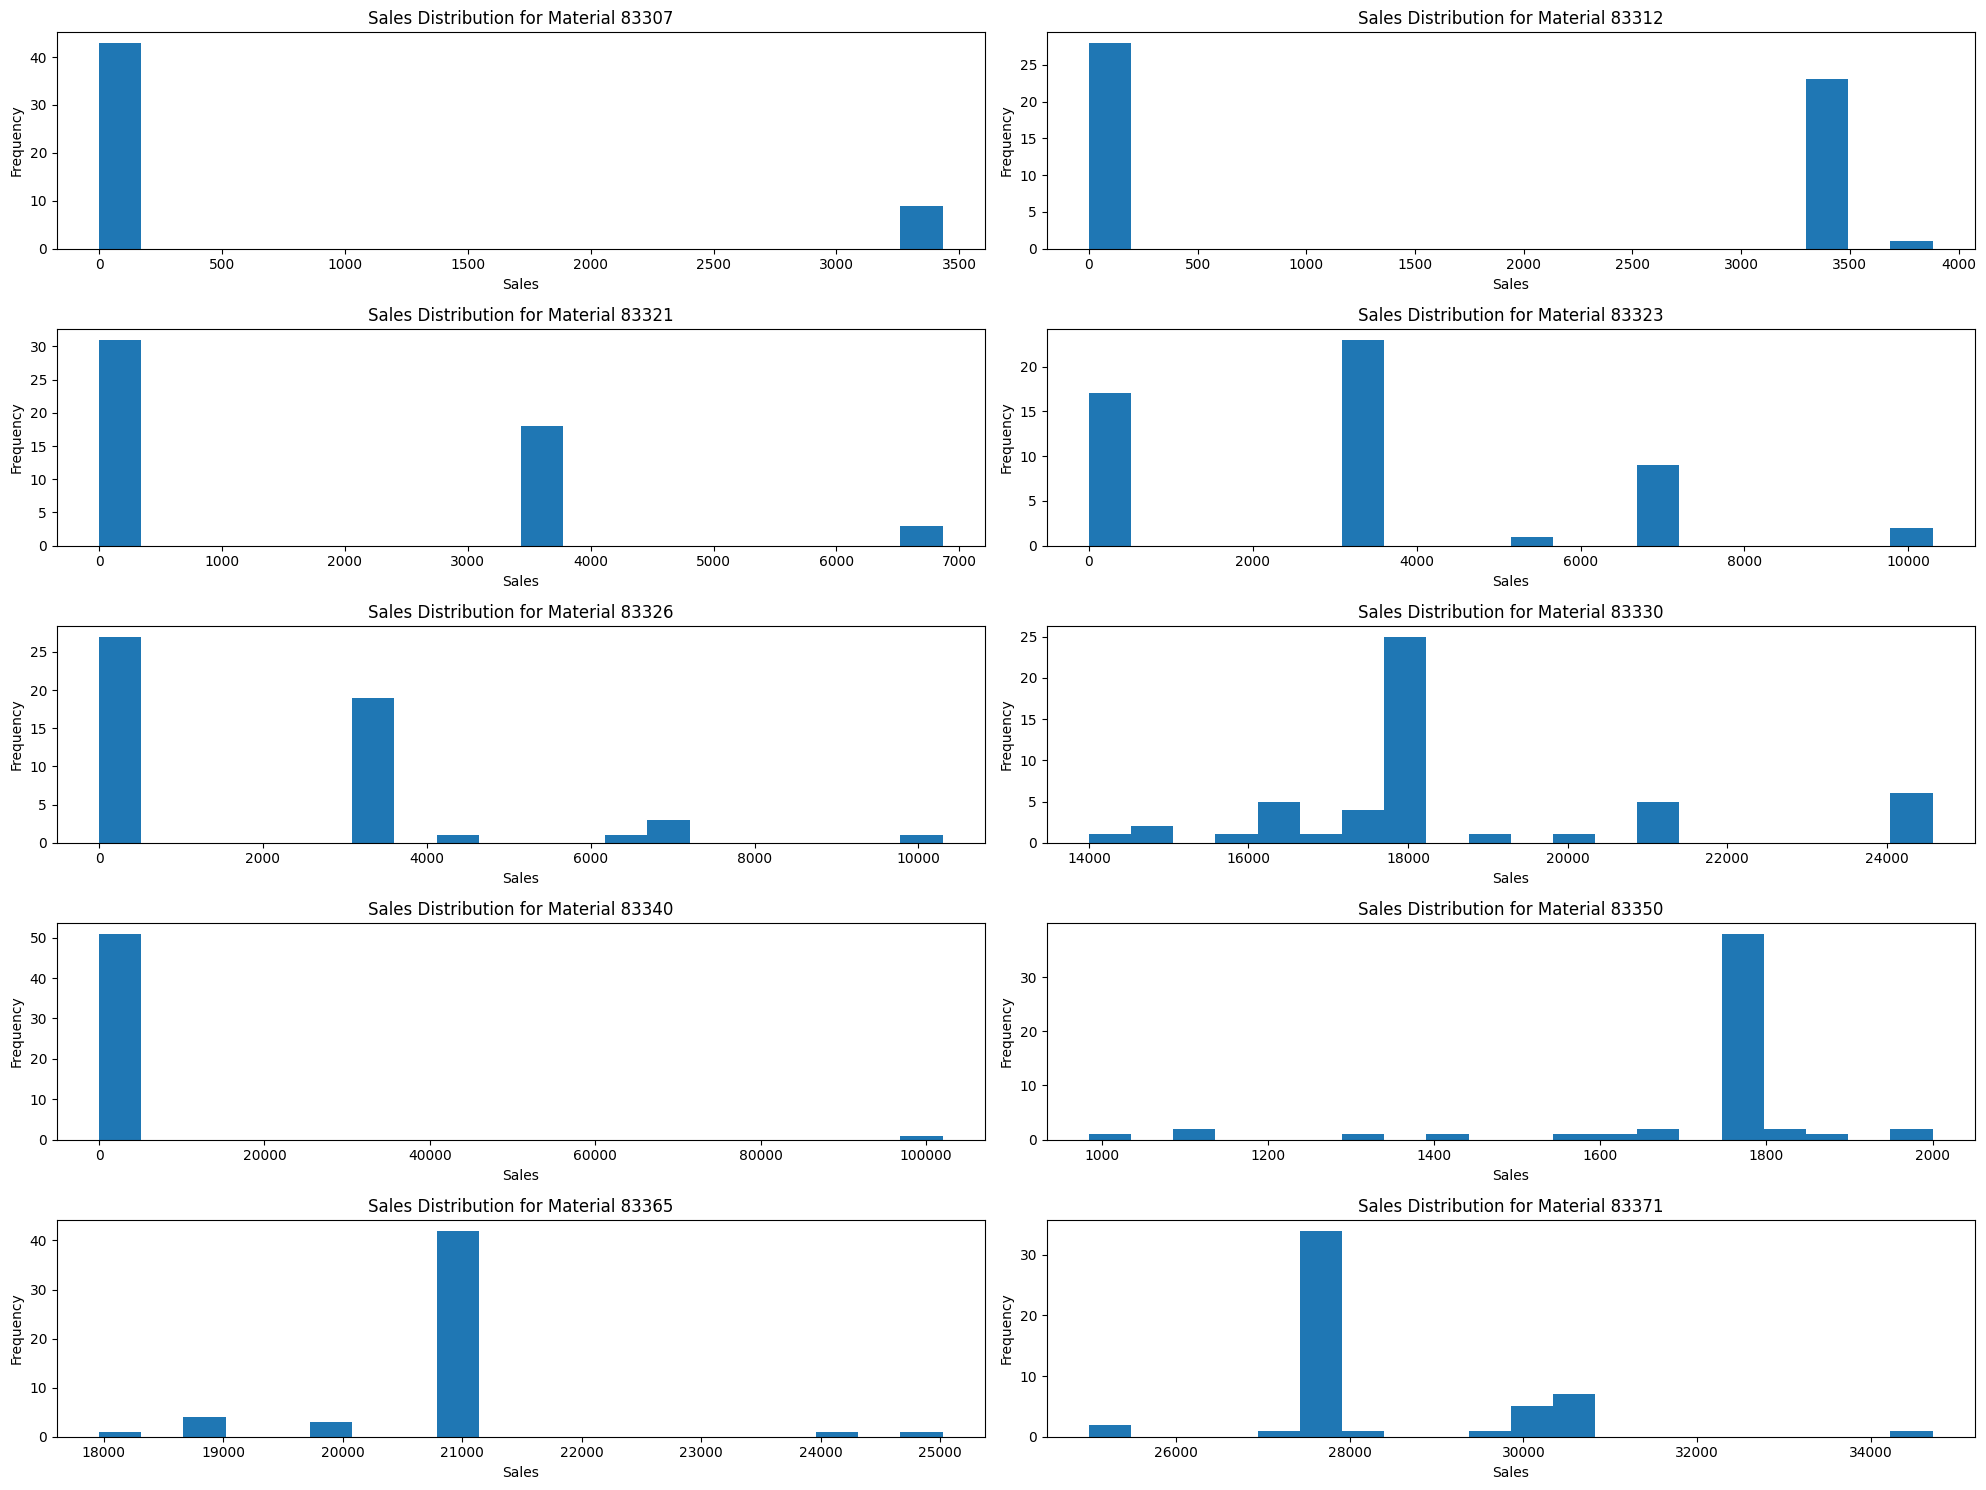

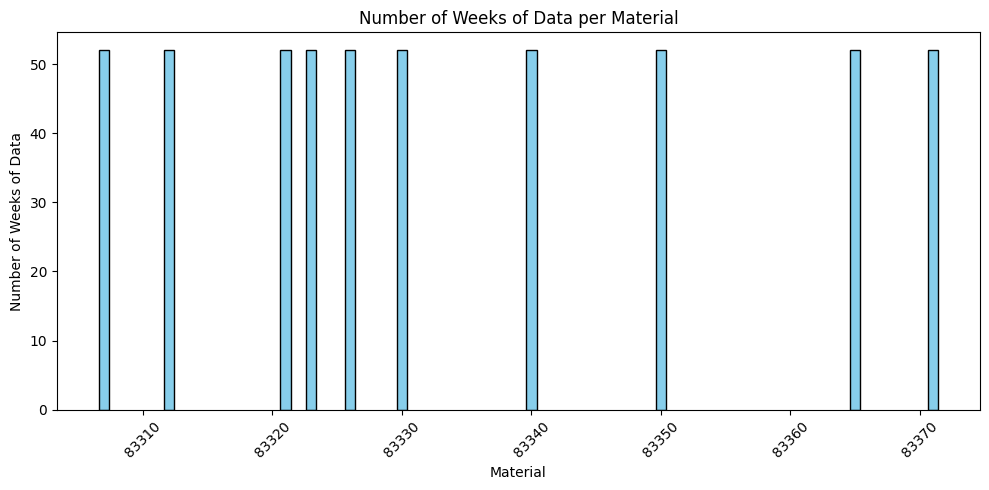

In [19]:
import matplotlib.pyplot as plt

# 1. Line plots for each material
plt.figure(figsize=(20, 15))
for i, material in enumerate(df['MATERIAL'].unique()):
    plt.subplot(5, 2, i + 1)
    sales_data = df[df['MATERIAL'] == material][[col for col in df.columns if 'SEMANA' in col]].values[0]
    
    # Plot the line
    plt.plot(sales_data, linestyle='-', color='blue')
    
    # Plot points separately - red for zeros, blue for non-zeros
    for x, y in enumerate(sales_data):
        color = 'red' if y == 0 else 'blue'
        plt.plot(x, y, marker='o', color=color)
    
    plt.title(f'Sales Trend for Material {material}')
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.xticks(range(0, len(sales_data), 5), [f'Week {i+1}' for i in range(0, len(sales_data), 5)], rotation=45)
plt.tight_layout()
plt.show()


# 2. Box plots for each material
plt.figure(figsize=(20, 15))
for i, material in enumerate(df['MATERIAL'].unique()):
    plt.subplot(5, 2, i + 1)
    df[df['MATERIAL'] == material][[col for col in df.columns if 'SEMANA' in col]].boxplot()
    plt.title(f'Sales Distribution for Material {material}')
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# 3. Histograms for each material
plt.figure(figsize=(20, 15))
for i, material in enumerate(df['MATERIAL'].unique()):
    plt.subplot(5, 2, i + 1)
    plt.hist(df[df['MATERIAL'] == material][[col for col in df.columns if 'SEMANA' in col]].values.flatten(), bins=20)
    plt.title(f'Sales Distribution for Material {material}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Bar chart for the number of weeks of data for each material
weeks_of_data = []
for material in df['MATERIAL'].unique():
    weeks_of_data.append(len([col for col in df[df['MATERIAL'] == material].columns if 'SEMANA' in col]))

plt.figure(figsize=(10, 5))
plt.bar(df['MATERIAL'].unique(), weeks_of_data, color='skyblue', edgecolor='black')
plt.xlabel("Material")
plt.ylabel("Number of Weeks of Data")
plt.title("Number of Weeks of Data per Material")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
Based on the analysis, the file does not contain sufficient data to run a reliable sales forecast for any of the materials. All materials had fewer than the minimum required 12 weeks of non-zero sales data.

### Data Analysis Key Findings
*   The dataset contains sales data for 10 unique materials over 52 weeks.
*   There are no missing values in the sales data or the 'MATERIAL' column.
*   Many materials show very little variation in sales across the 52 weeks, with standard deviations often being zero or NaN.
*   All materials in the dataset have fewer than the defined minimum of 12 weeks with non-zero sales data.

### Insights or Next Steps
*   To perform reliable sales forecasting, more historical data is needed, ideally with at least 1-2 years of weekly sales data for each material.
*   Investigate the reason for the low variability and the low number of weeks with non-zero sales for each material to understand the nature of the sales data.



Tabla de intermitencia de demanda (guardada en 'intermitencia_demanda.csv'):
 Material  Periodos en 0  % Periodos en 0
    83307             43            82.69
    83312             28            53.85
    83321             31            59.62
    83323             17            32.69
    83326             27            51.92
    83330              0             0.00
    83340             51            98.08
    83350              0             0.00
    83365              0             0.00
    83371              0             0.00


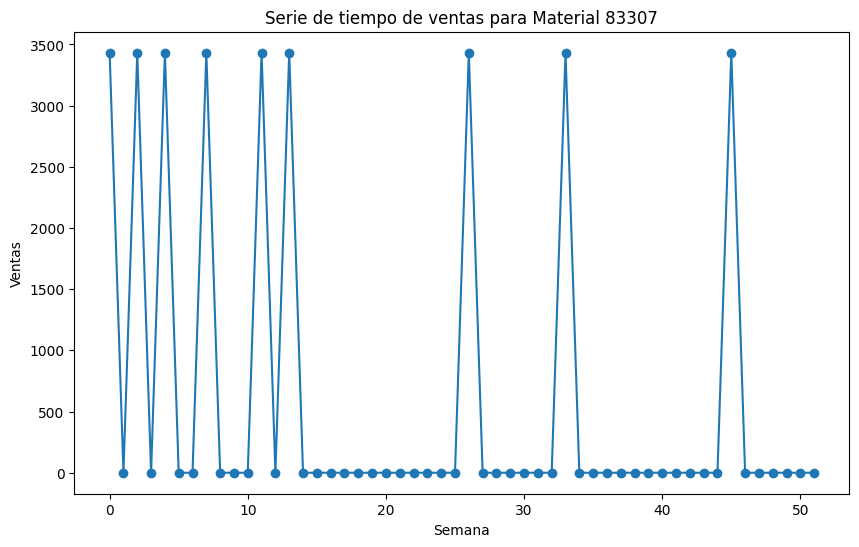

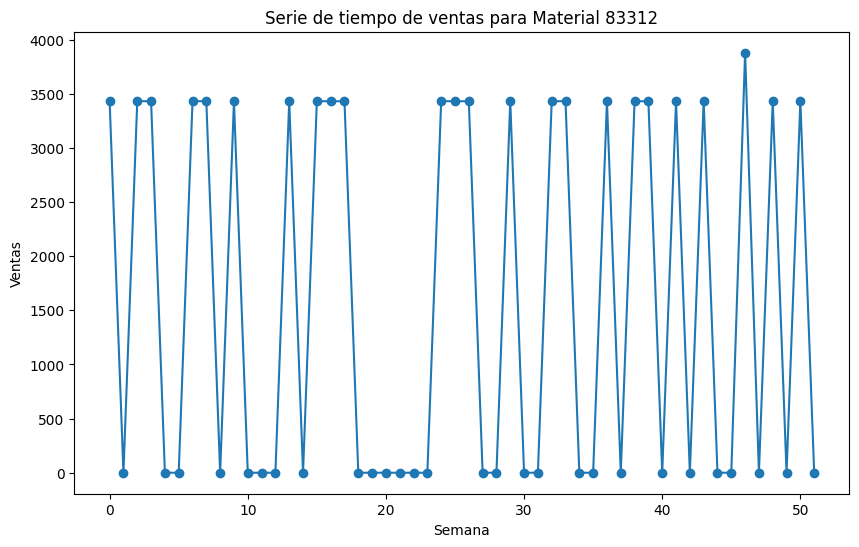

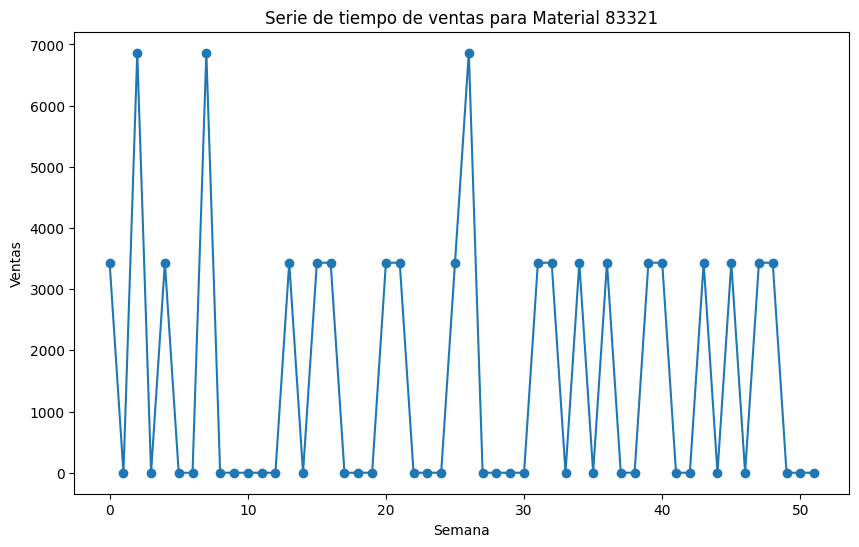

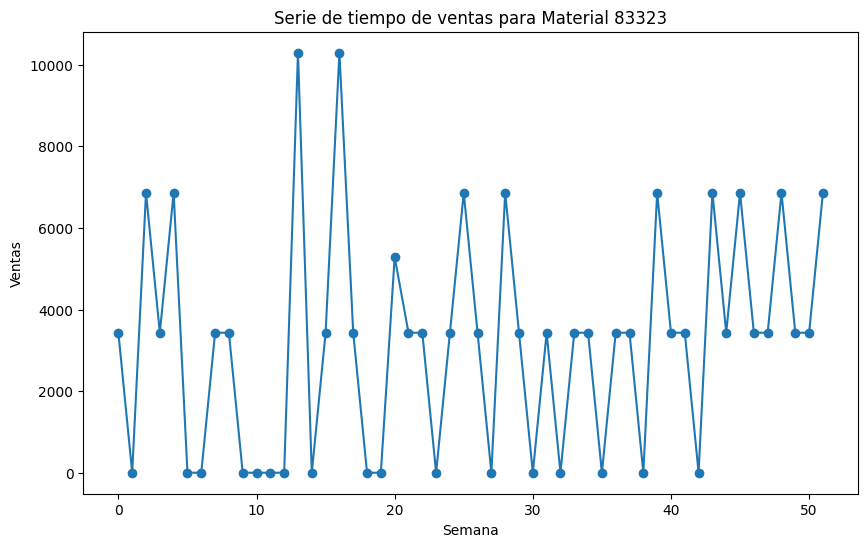

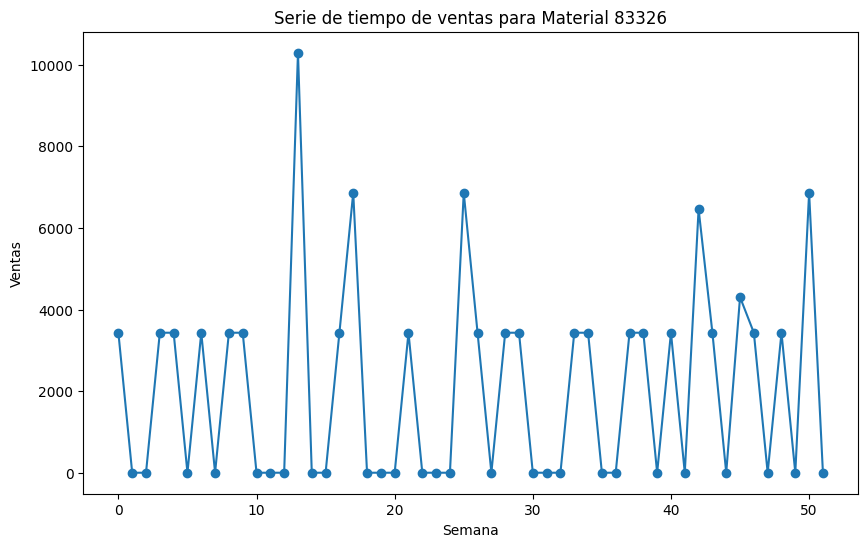

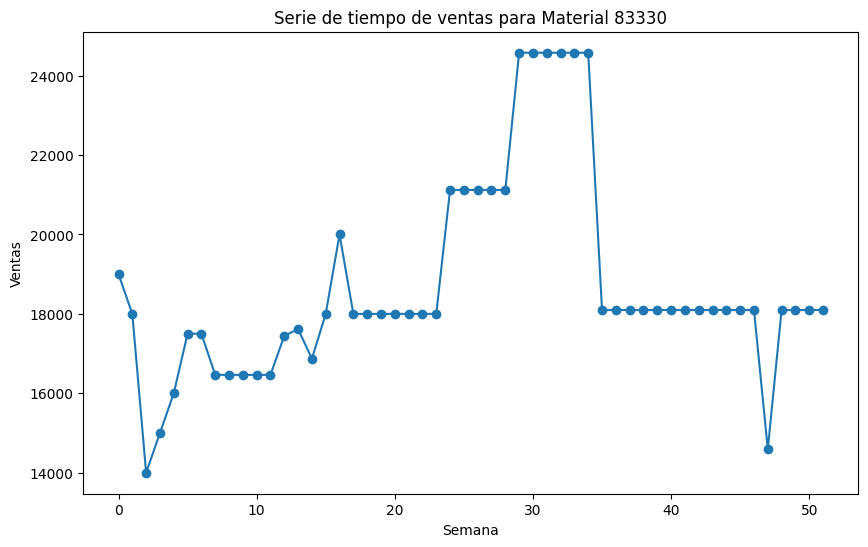

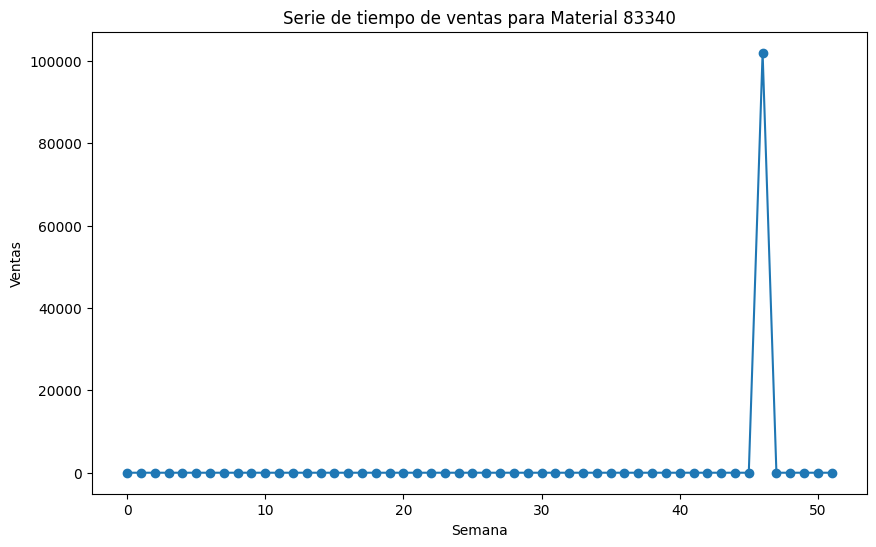

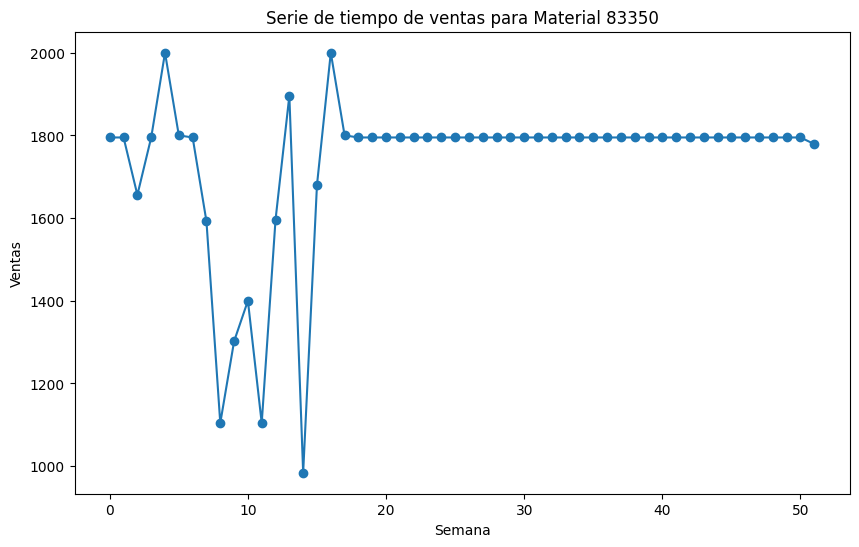

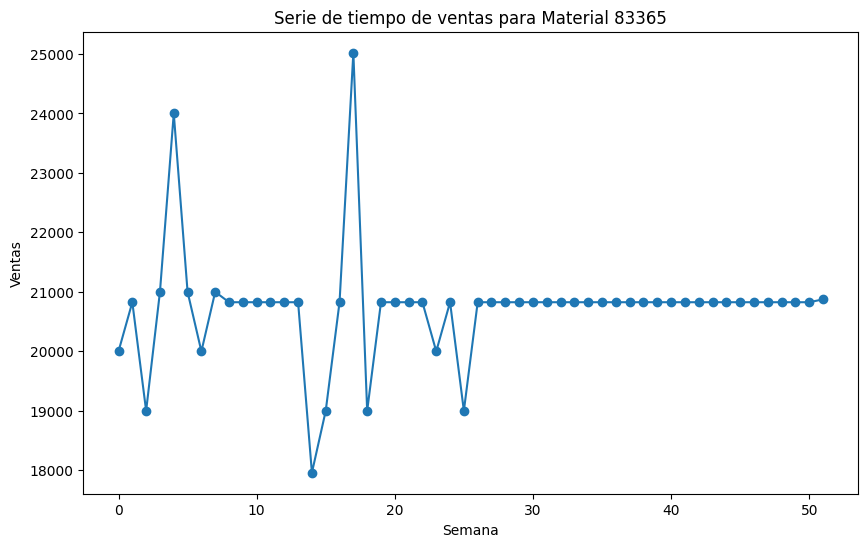

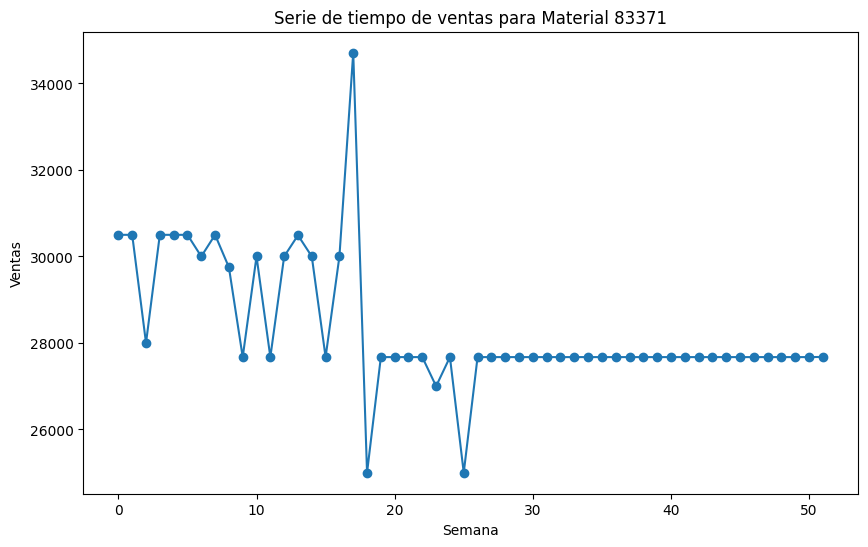

In [ ]:
# Evaluar la intermitencia de la demanda para cada material
for material in df['MATERIAL'].unique():
    material_data = df[df['MATERIAL'] == material]
    sales_columns = [col for col in material_data.columns if 'SEMANA' in col]
    sales_data = material_data[sales_columns].values[0]

    # Calcular el número de períodos de cero demanda
    zero_sales_periods = sum(sales_data == 0)
    total_periods = len(sales_data)
    zero_sales_percentage = (zero_sales_periods / total_periods) * 100

    print(f"Material {material}: {zero_sales_periods} periodos con cero ventas de {total_periods} ({zero_sales_percentage:.2f}%)")

    # Visualizar la serie de tiempo para una inspección visual
    plt.figure(figsize=(10, 6))
    plt.plot(sales_data, marker='o', linestyle='-')
    plt.title(f'Serie de tiempo de ventas para Material {material}')
    plt.xlabel('Semana')
    plt.ylabel('Ventas')
    plt.show()

Número de materiales únicos: 10

Primeras filas del DataFrame:
   CENTRO  MARCA  SUB FAMILIA  FORMATO  SOLICITANTE  MATERIAL  \
0    1000      6           60        7       229900     83307   
1    1000      6           60        7       229900     83312   
2    1000      6           60        7       229900     83321   
3    1000      6           60        7       229900     83323   
4    1000      6           60        7       229900     83326   

                            DESCRIPCIÓN  NOTA UNIDAD  SEMANA 1  ...  \
0    PATE DE FRANGO 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
1  PATE ERVAS FINAS 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
2        PATﾉ DE SALMAO 125G PINGO DOCE   NaN    UPV      3432  ...   
3      PATE DE ATUM 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
4      PATE IBERICO 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   

   SEMANA 43  SEMANA 44  SEMANA 45  SEMANA 46  SEMANA 47  SEMANA 48  \
0          0          0          0       3432   

D:\Users\juan.giraldo\AppData\Local\Temp\ipykernel_22912\3497785223.py:65: UserWarning: Glyph 65417 (\N{HALFWIDTH KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Users\juan.giraldo\AppData\Local\Temp\ipykernel_22912\3497785223.py:65: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 2000x1500 with 0 Axes>

D:\Users\juan.giraldo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65417 (\N{HALFWIDTH KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\juan.giraldo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


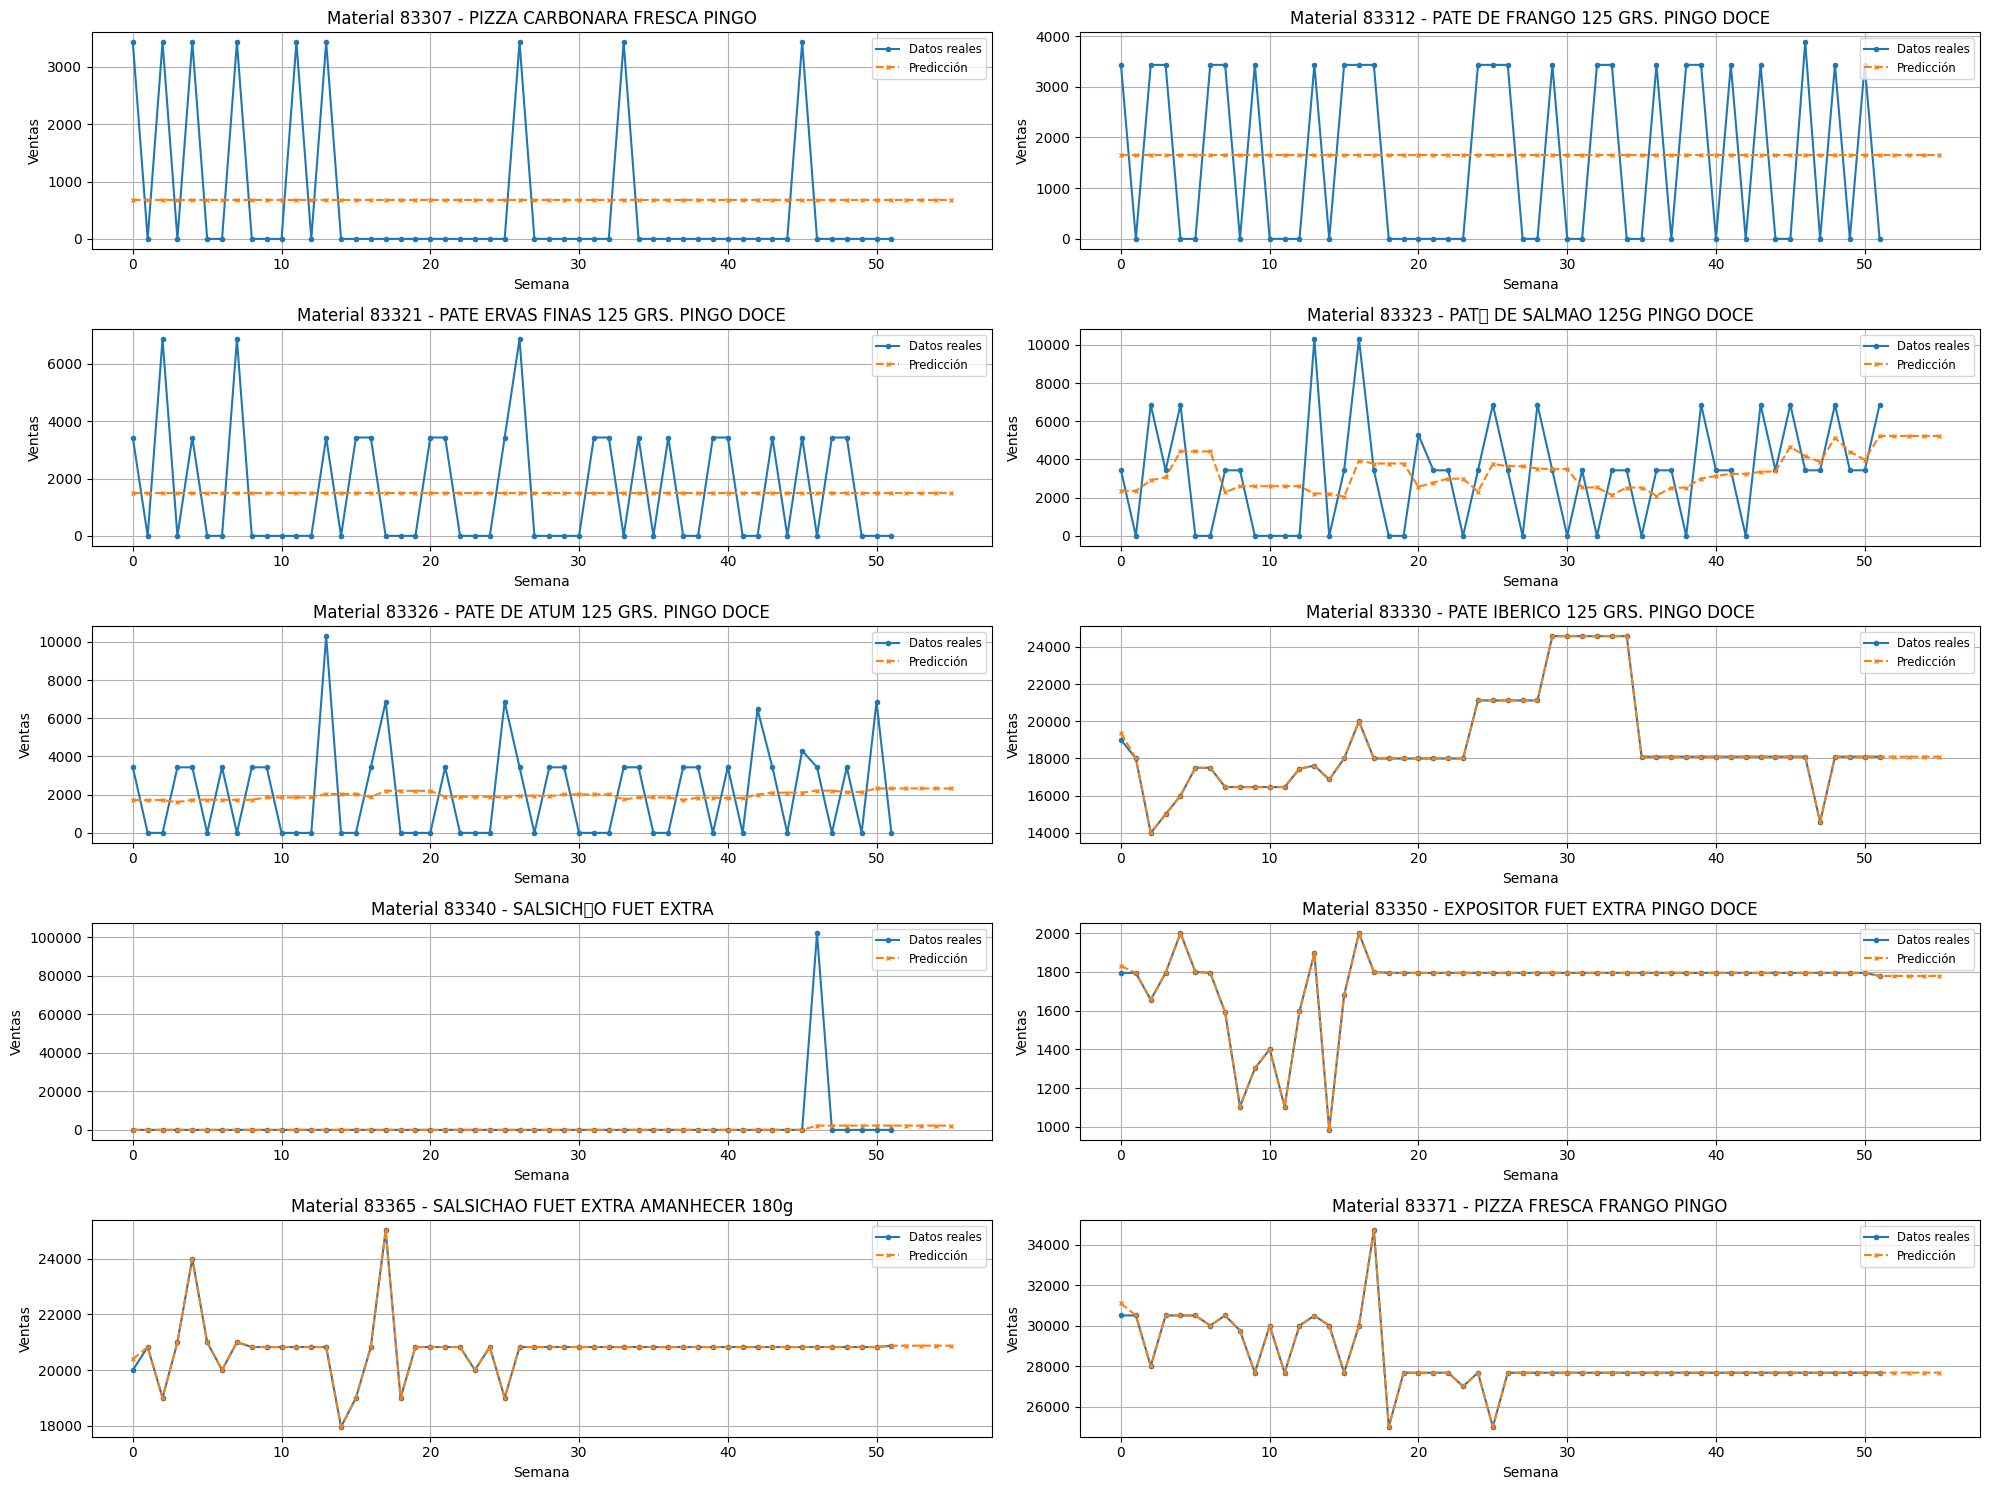

In [21]:
# Importar las bibliotecas necesarias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from croston import croston

# Verificar los datos
print("Número de materiales únicos:", len(df['MATERIAL'].unique()))
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Crear un diccionario para almacenar los resultados
predicciones = {}

# Crear una figura con subplots para todos los materiales
plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada material
for idx, material in enumerate(df['MATERIAL'].unique()):
    # Obtener los datos de ventas para el material
    material_data = df[df['MATERIAL'] == material]
    sales_columns = [col for col in material_data.columns if 'SEMANA' in col]
    sales_data = material_data[sales_columns].values[0]
    
    # Aplicar el método de Croston
    try:
        # Calcular la predicción
        forecast_length = 4  # Número de períodos a predecir
        
        # Aplicar el método de Croston usando fit_croston
        fit_pred = croston.fit_croston(sales_data, forecast_length, 'original')
        
        # Obtener las predicciones
        yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])
        
        # Almacenar los resultados
        predicciones[material] = {
            'original': sales_data,
            'prediccion': yhat
        }
        
        # Visualizar los resultados en el subplot correspondiente
        ax = axes[idx]
        ax.plot(sales_data, label='Datos reales', marker='o', markersize=3)
        ax.plot(yhat, label='Predicción', marker='x', linestyle='--', markersize=3)
        ax.set_title(f'Material {material} - {descripcion}')
        ax.set_xlabel('Semana')
        ax.set_ylabel('Ventas')
        ax.legend(fontsize='small')
        ax.grid(True)
        
        # Imprimir las predicciones
        descripcion = material_data['DESCRIPCIÓN'].values[0]
        print(f"\nPredicciones para {descripcion}:")
        for i, pred in enumerate(fit_pred['croston_forecast']):
            print(f"Semana {len(sales_data) + i + 1}: {pred:.2f}")
            
    except Exception as e:
        print(f"Error al procesar el material {material}: {str(e)}")

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

Número de materiales únicos: 10

Primeras filas del DataFrame:
   CENTRO  MARCA  SUB FAMILIA  FORMATO  SOLICITANTE  MATERIAL  \
0    1000      6           60        7       229900     83307   
1    1000      6           60        7       229900     83312   
2    1000      6           60        7       229900     83321   
3    1000      6           60        7       229900     83323   
4    1000      6           60        7       229900     83326   

                            DESCRIPCIÓN  NOTA UNIDAD  SEMANA 1  ...  \
0    PATE DE FRANGO 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
1  PATE ERVAS FINAS 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
2        PATﾉ DE SALMAO 125G PINGO DOCE   NaN    UPV      3432  ...   
3      PATE DE ATUM 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
4      PATE IBERICO 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   

   SEMANA 43  SEMANA 44  SEMANA 45  SEMANA 46  SEMANA 47  SEMANA 48  \
0          0          0          0       3432   

D:\Users\juan.giraldo\AppData\Local\Temp\ipykernel_22912\3497785223.py:65: UserWarning: Glyph 65417 (\N{HALFWIDTH KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Users\juan.giraldo\AppData\Local\Temp\ipykernel_22912\3497785223.py:65: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 2000x1500 with 0 Axes>

D:\Users\juan.giraldo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65417 (\N{HALFWIDTH KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\juan.giraldo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


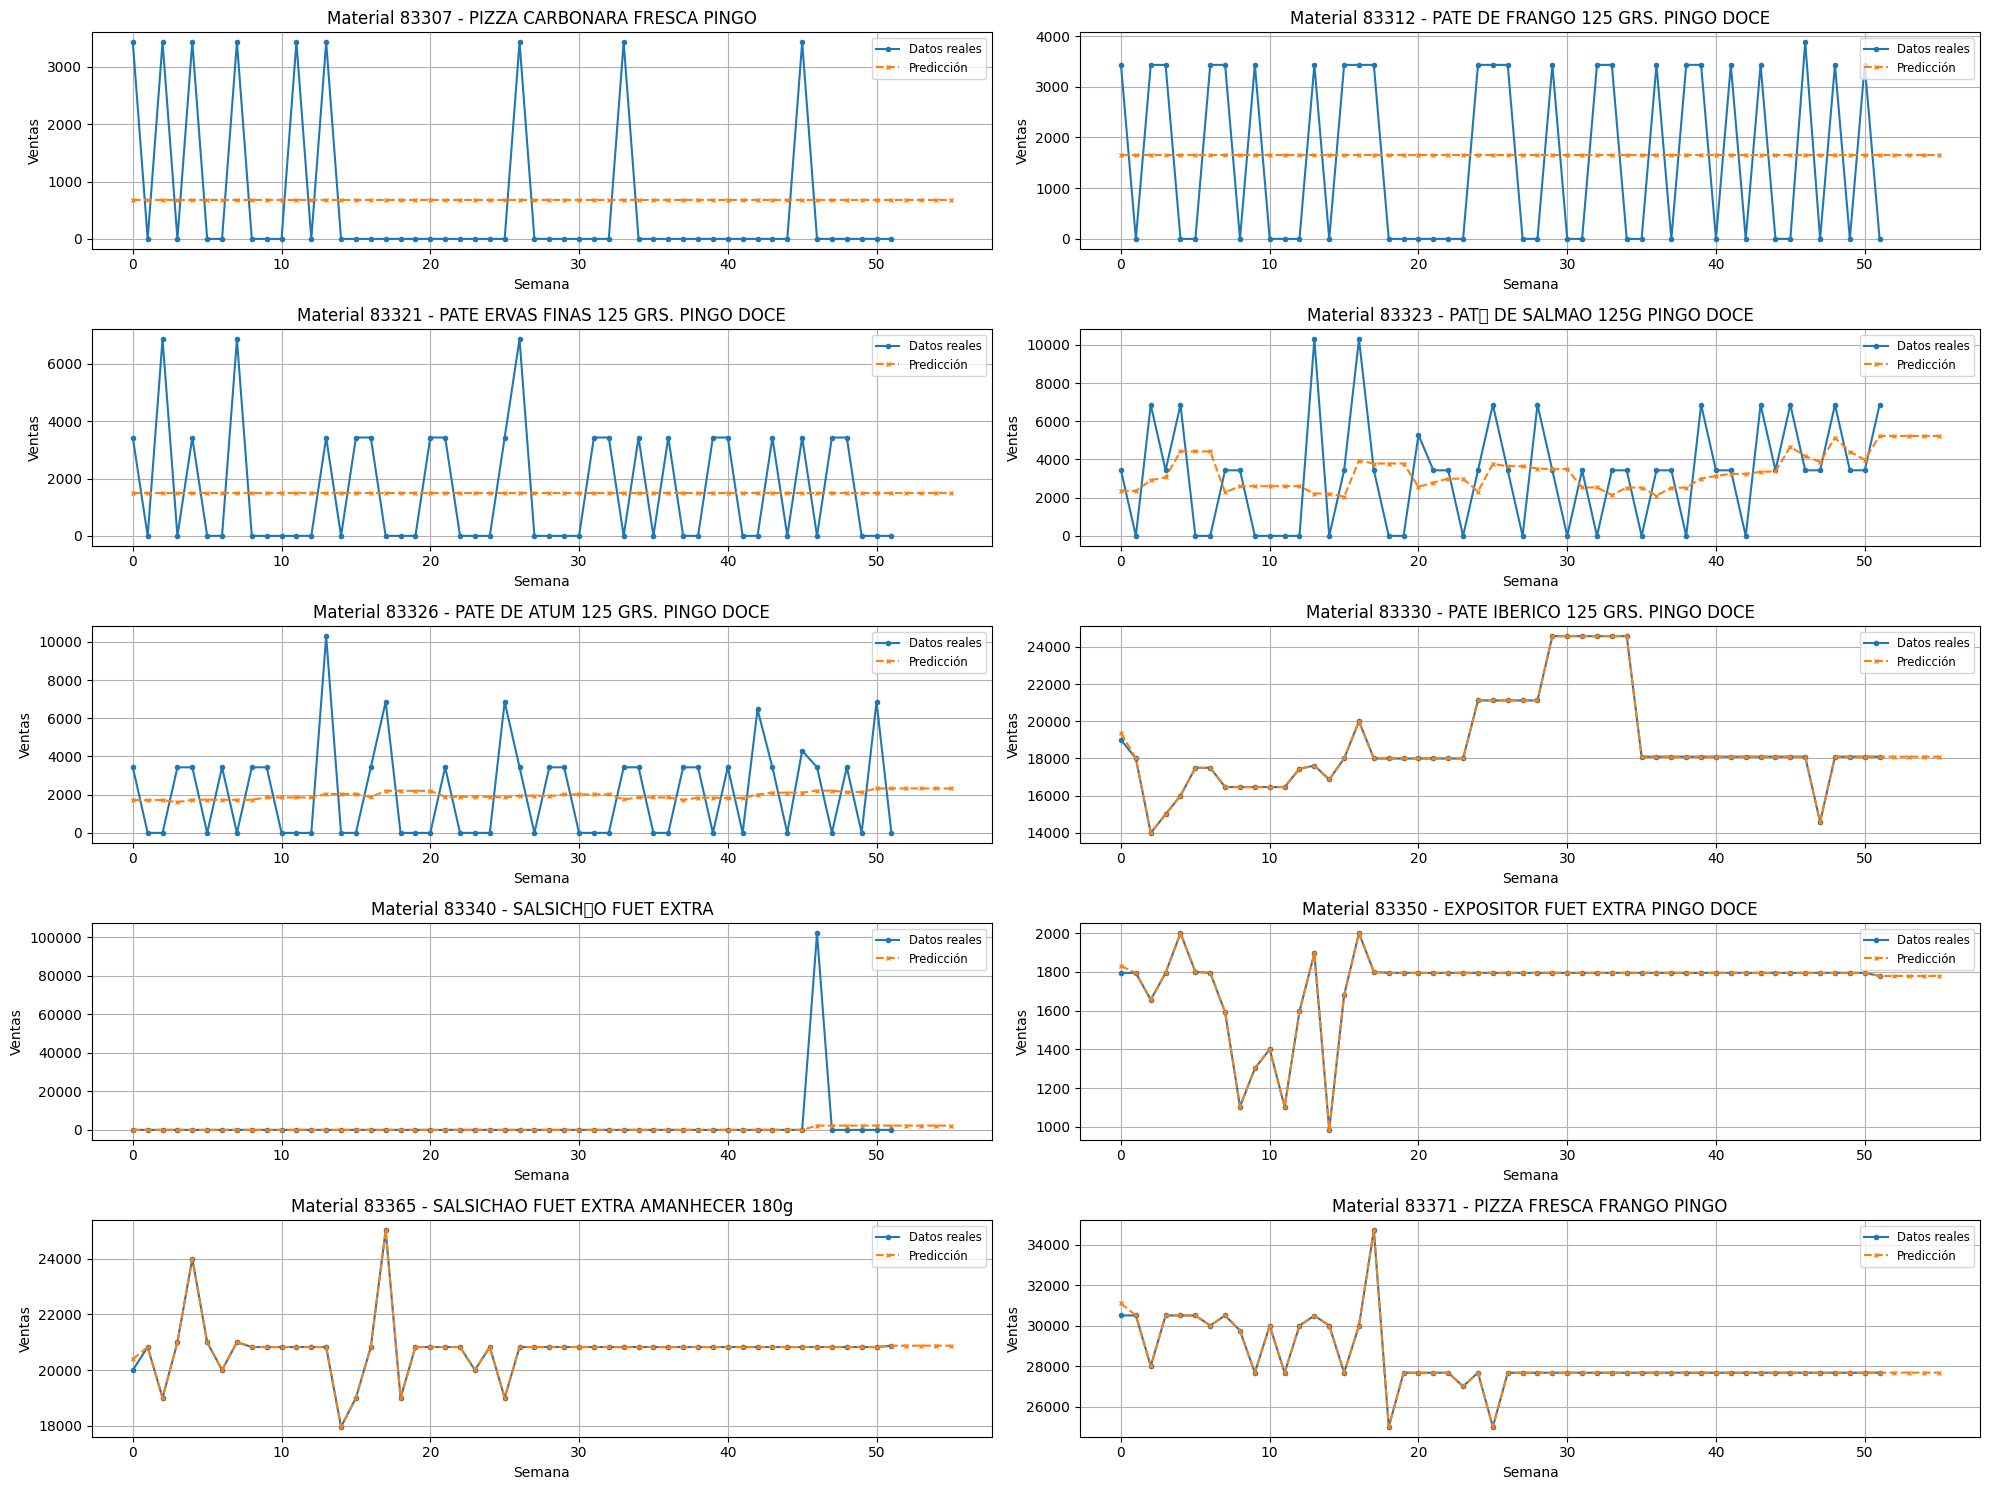

In [ ]:
# Importar las bibliotecas necesarias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from croston import croston

# Verificar los datos
print("Número de materiales únicos:", len(df['MATERIAL'].unique()))
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Crear un diccionario para almacenar los resultados
predicciones = {}

# Crear una figura con subplots para todos los materiales
plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada material
for idx, material in enumerate(df['MATERIAL'].unique()):
    # Obtener los datos de ventas para el material
    material_data = df[df['MATERIAL'] == material]
    sales_columns = [col for col in material_data.columns if 'SEMANA' in col]
    sales_data = material_data[sales_columns].values[0]
    
    # Aplicar el método de Croston
    try:
        # Calcular la predicción
        forecast_length = 4  # Número de períodos a predecir
        
        # Aplicar el método de Croston usando fit_croston
        fit_pred = croston.fit_croston(sales_data, forecast_length, 'original')
        
        # Obtener las predicciones
        yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])
        
        # Almacenar los resultados
        predicciones[material] = {
            'original': sales_data,
            'prediccion': yhat
        }
        
        # Visualizar los resultados en el subplot correspondiente
        ax = axes[idx]
        ax.plot(sales_data, label='Datos reales', marker='o', markersize=3)
        ax.plot(yhat, label='Predicción', marker='x', linestyle='--', markersize=3)
        ax.set_title(f'Material {material} - {descripcion}')
        ax.set_xlabel('Semana')
        ax.set_ylabel('Ventas')
        ax.legend(fontsize='small')
        ax.grid(True)
        
        # Imprimir las predicciones
        descripcion = material_data['DESCRIPCIÓN'].values[0]
        print(f"\nPredicciones para {descripcion}:")
        for i, pred in enumerate(fit_pred['croston_forecast']):
            print(f"Semana {len(sales_data) + i + 1}: {pred:.2f}")
            
    except Exception as e:
        print(f"Error al procesar el material {material}: {str(e)}")

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

Número de materiales únicos: 10

Primeras filas del DataFrame:
   CENTRO  MARCA  SUB FAMILIA  FORMATO  SOLICITANTE  MATERIAL  \
0    1000      6           60        7       229900     83307   
1    1000      6           60        7       229900     83312   
2    1000      6           60        7       229900     83321   
3    1000      6           60        7       229900     83323   
4    1000      6           60        7       229900     83326   

                            DESCRIPCIÓN  NOTA UNIDAD  SEMANA 1  ...  \
0    PATE DE FRANGO 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
1  PATE ERVAS FINAS 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
2        PATﾉ DE SALMAO 125G PINGO DOCE   NaN    UPV      3432  ...   
3      PATE DE ATUM 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   
4      PATE IBERICO 125 GRS. PINGO DOCE   NaN    UPV      3432  ...   

   SEMANA 43  SEMANA 44  SEMANA 45  SEMANA 46  SEMANA 47  SEMANA 48  \
0          0          0          0       3432   

D:\Users\juan.giraldo\AppData\Local\Temp\ipykernel_22912\3497785223.py:65: UserWarning: Glyph 65417 (\N{HALFWIDTH KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Users\juan.giraldo\AppData\Local\Temp\ipykernel_22912\3497785223.py:65: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 2000x1500 with 0 Axes>

D:\Users\juan.giraldo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65417 (\N{HALFWIDTH KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\juan.giraldo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


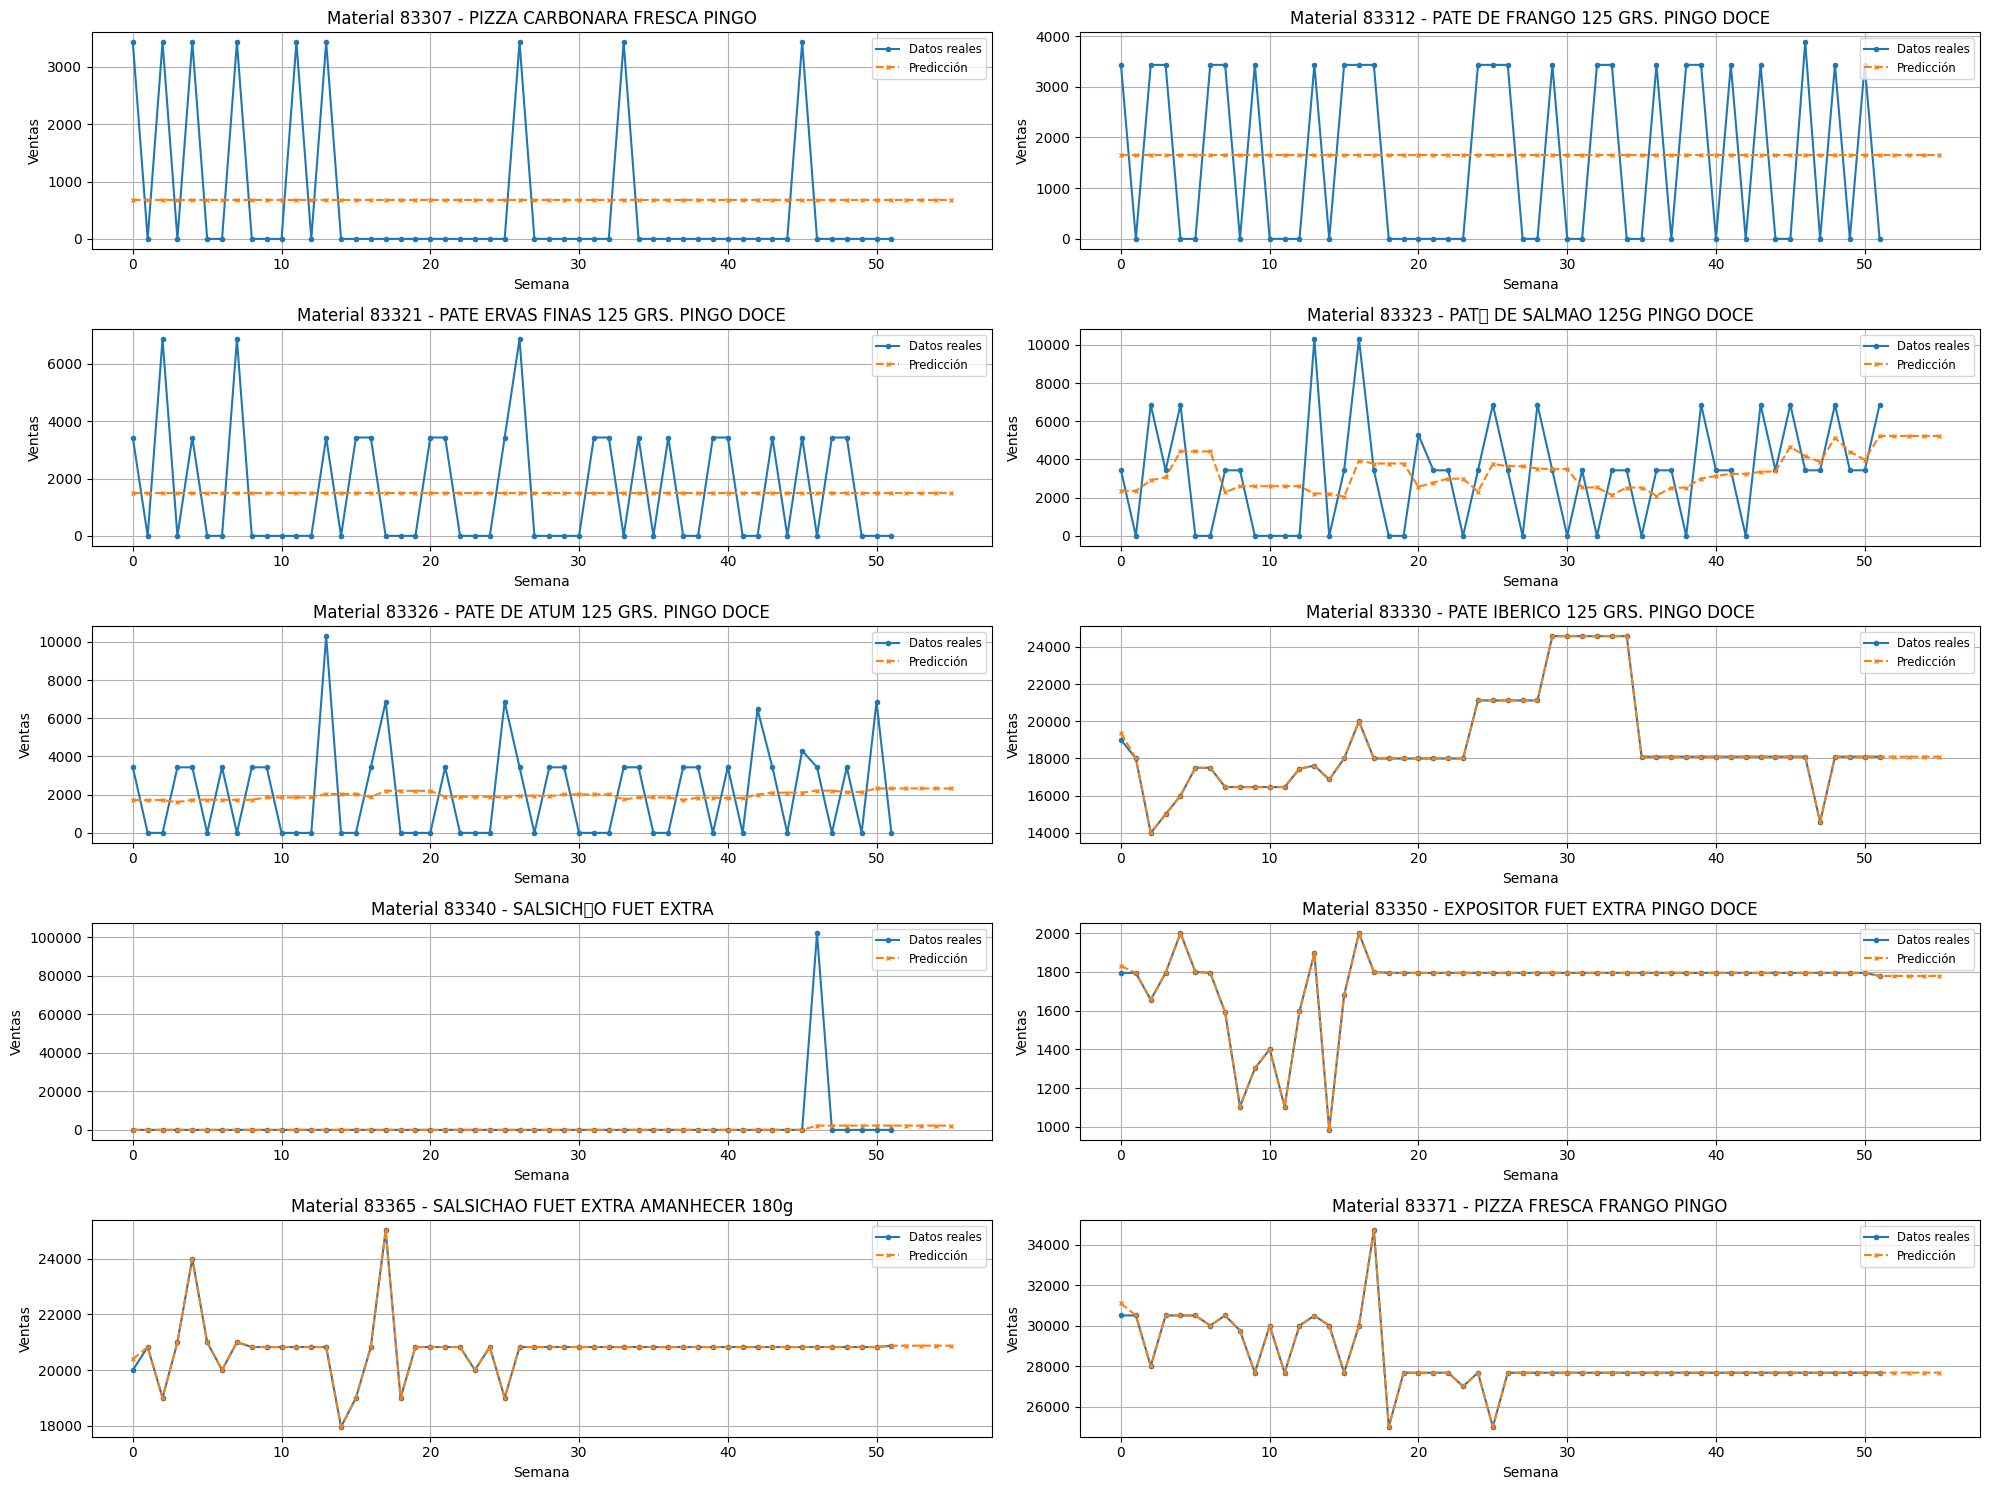

In [ ]:
# Importar las bibliotecas necesarias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from croston import croston

# Verificar los datos
print("Número de materiales únicos:", len(df['MATERIAL'].unique()))
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Crear un diccionario para almacenar los resultados
predicciones = {}

# Crear una figura con subplots para todos los materiales
plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada material
for idx, material in enumerate(df['MATERIAL'].unique()):
    # Obtener los datos de ventas para el material
    material_data = df[df['MATERIAL'] == material]
    sales_columns = [col for col in material_data.columns if 'SEMANA' in col]
    sales_data = material_data[sales_columns].values[0]
    
    # Aplicar el método de Croston
    try:
        # Calcular la predicción
        forecast_length = 4  # Número de períodos a predecir
        
        # Aplicar el método de Croston usando fit_croston
        fit_pred = croston.fit_croston(sales_data, forecast_length, 'original')
        
        # Obtener las predicciones
        yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])
        
        # Almacenar los resultados
        predicciones[material] = {
            'original': sales_data,
            'prediccion': yhat
        }
        
        # Visualizar los resultados en el subplot correspondiente
        ax = axes[idx]
        ax.plot(sales_data, label='Datos reales', marker='o', markersize=3)
        ax.plot(yhat, label='Predicción', marker='x', linestyle='--', markersize=3)
        ax.set_title(f'Material {material} - {descripcion}')
        ax.set_xlabel('Semana')
        ax.set_ylabel('Ventas')
        ax.legend(fontsize='small')
        ax.grid(True)
        
        # Imprimir las predicciones
        descripcion = material_data['DESCRIPCIÓN'].values[0]
        print(f"\nPredicciones para {descripcion}:")
        for i, pred in enumerate(fit_pred['croston_forecast']):
            print(f"Semana {len(sales_data) + i + 1}: {pred:.2f}")
            
    except Exception as e:
        print(f"Error al procesar el material {material}: {str(e)}")

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()